# Noising Experiments for q = 0 and Periodic Noise


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from utils.images_generator import periodic_noise, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from itertools import combinations
from skimage import data
from skimage.color import rgb2gray

## Imagens default

In [2]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data_list.append(image_data)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [3]:
image_data_list

[   q  Smoothness  Curve structure  Weighted Entropy Correct  \
 0  0    0.645903         0.020627                  0.662781   
 
    Weighted Complexity Correct     prob0     prob1     prob2  image_name  
 0                     0.318842  0.979236  0.020695  0.000068  colored_k6  ,
    q  Smoothness  Curve structure  Weighted Entropy Correct  \
 0  0    0.666667              0.0                      -0.0   
 
    Weighted Complexity Correct  prob0  prob1  prob2   image_name  
 0                         -0.0    1.0    0.0    0.0  uniform 127  ]

In [3]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.651162         0.015368                   0.64624   
1  0    0.666667         0.000000                  -0.00000   

   Weighted Complexity Correct     prob0     prob1     prob2   image_name  
0                     0.323495  0.984496  0.015436  0.000068   colored_k6  
1                    -0.000000  1.000000  0.000000  0.000000  uniform 127

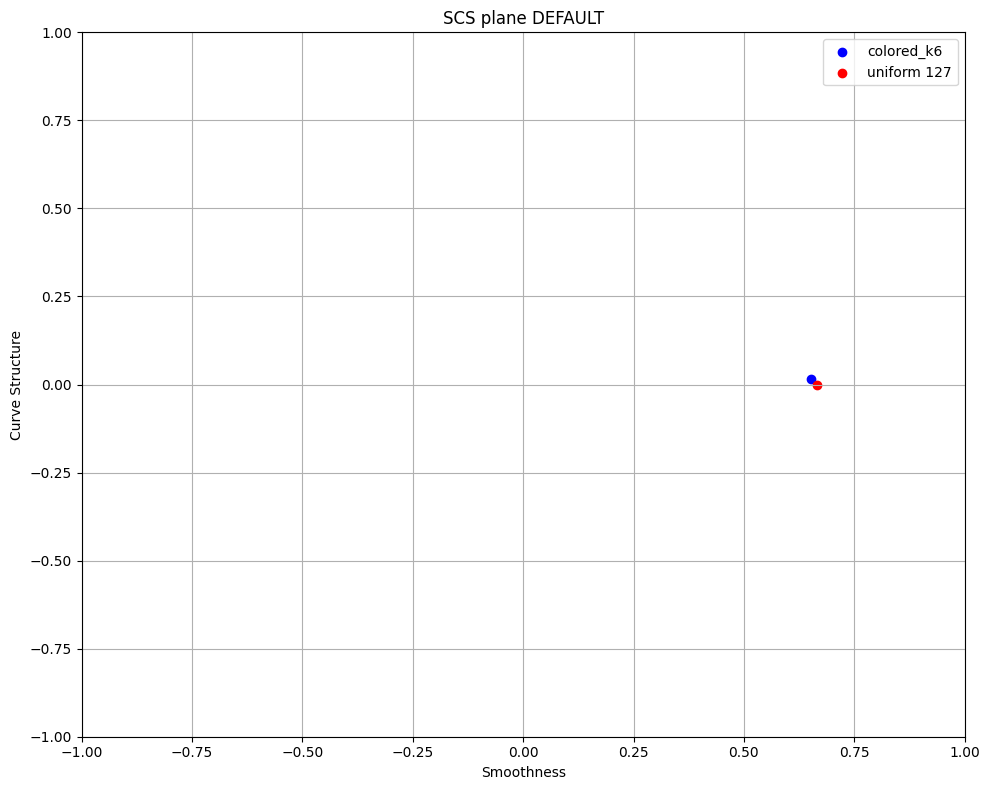

In [4]:
figname_to_color = {
    'colored_k6': 'blue',
    'uniform 127': 'red'
}
unique_default_images = data_default_aux['image_name'].unique()

plt.subplots(figsize=(10, 8))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
plt.title(f'SCS plane DEFAULT')
plt.xlabel('Smoothness')
plt.ylabel('Curve Structure')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

--------------------------

In [2]:
image_data = pd.read_csv(f"results/noise_analysis/periodic/periodic_analysis.csv")
image_data = pd.read_csv(f"results/noise_analysis/periodic/periodic_analysis_sintorn_quali.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/periodic/periodic_analysis_default.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/periodic/periodic_analysis_default_v2.csv")


In [3]:
image_data.head()

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.215946         0.203333                  0.945994   
1  0    0.215946         0.203333                  0.945994   
2  0    0.221615         0.205724                  0.948452   
3  0    0.244906         0.219999                  0.936666   
4  0    0.281857         0.218018                  0.912035   

   Weighted Complexity Correct     prob0     prob1     prob2  \
0                     0.069611  0.549279  0.327027  0.123694   
1                     0.069611  0.549279  0.327027  0.123694   
2                     0.067603  0.554948  0.325388  0.119664   
3                     0.081710  0.578239  0.320880  0.100881   
4                     0.106810  0.615190  0.301414  0.083396   

                 image_name  fx_value  fy_value  amp_value  
0  couscous01-r000-s001.png         0         0          0  
1  couscous01-r000-s001.png         5         5          0  
2  couscous01-r000-s001.png         5         5         20  
3  couscous01-r000-s001.png         5         5         40  
4  couscous01-r000-s001.png         5         5         60

In [57]:
image_data_default.head()

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.597887         0.059627                  0.690509   
1  0    0.597887         0.059627                  0.690509   
2  0    0.528083         0.107438                  0.723404   
3  0    0.529927         0.082235                  0.653258   
4  0    0.541812         0.046308                  0.614478   

   Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
0                     0.288336  0.931221  0.064203  0.004576  colored_k6   
1                     0.288336  0.931221  0.064203  0.004576  colored_k6   
2                     0.254751  0.861417  0.123011  0.015573  colored_k6   
3                     0.274235  0.863261  0.109487  0.027252  colored_k6   
4                     0.286307  0.875145  0.085582  0.039273  colored_k6   

   fx_value  fy_value  amp_value  
0         0         0          0  
1         5         5          0  
2         5         5         20  
3         5         5         40  
4         5         5         60

In [58]:
filenames = image_data.image_name.unique()
img_default_names = image_data_default.image_name.unique()
print(filenames)
print(img_default_names)

['couscous01-r000-s001.png' 'lentils01-r000-s001.png'
 'sprinkles01-r000-s001.png' 'towel01-r000-s001.png']
['colored_k6' 'uniform 127']


In [4]:
print("Image data FX unique",image_data.fx_value.unique())
print("Image data FY unique",image_data.fy_value.unique())
print("Image data AMP unique",image_data.amp_value.unique())
print("Default data FX unique",image_data_default.fx_value.unique())
print("Default data FY unique",image_data_default.fy_value.unique())
print("Default data AMP unique",image_data_default.amp_value.unique())

Image data FX unique [ 0  5 10 20 30 40]
Image data FY unique [ 0  5 10 20 30 40]
Image data AMP unique [  0  20  40  60  80 100]
Default data FX unique [ 0  5 10 20 30 40]
Default data FY unique [ 0  5 10 20 30 40]
Default data AMP unique [  0  20  40  60  80 100]


In [60]:
default_data = image_data_default 
dataset_data = image_data[(image_data['image_name'] != 'colored_k6') & (image_data['image_name'] != 'uniform 127')]

In [39]:
print(dataset_data.shape)
dataset_data.head()

(68, 12)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.215946         0.203333                  0.945994   
1  0    0.215946         0.203333                  0.945994   
2  0    0.221615         0.205724                  0.948452   
3  0    0.244906         0.219999                  0.936666   
4  0    0.281857         0.218018                  0.912035   

   Weighted Complexity Correct     prob0     prob1     prob2  \
0                     0.069611  0.549279  0.327027  0.123694   
1                     0.069611  0.549279  0.327027  0.123694   
2                     0.067603  0.554948  0.325388  0.119664   
3                     0.081710  0.578239  0.320880  0.100881   
4                     0.106810  0.615190  0.301414  0.083396   

                 image_name  fx_value  fy_value  amp_value  
0  couscous01-r000-s001.png         0         0          0  
1  couscous01-r000-s001.png         5         5          0  
2  couscous01-r000-s001.png         5         5         20  
3  couscous01-r000-s001.png         5         5         40  
4  couscous01-r000-s001.png         5         5         60

Plotting the plane for the default images (q=0)

In [61]:
q_value = 0
default_data_q0 = default_data[(default_data['q'] == q_value)]
print(default_data.shape)
print(default_data_q0.shape)
default_data_q0.head()

(34, 12)
(34, 12)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.597887         0.059627                  0.690509   
1  0    0.597887         0.059627                  0.690509   
2  0    0.528083         0.107438                  0.723404   
3  0    0.529927         0.082235                  0.653258   
4  0    0.541812         0.046308                  0.614478   

   Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
0                     0.288336  0.931221  0.064203  0.004576  colored_k6   
1                     0.288336  0.931221  0.064203  0.004576  colored_k6   
2                     0.254751  0.861417  0.123011  0.015573  colored_k6   
3                     0.274235  0.863261  0.109487  0.027252  colored_k6   
4                     0.286307  0.875145  0.085582  0.039273  colored_k6   

   fx_value  fy_value  amp_value  
0         0         0          0  
1         5         5          0  
2         5         5         20  
3         5         5         40  
4         5         5         60

In [62]:
default_data[(default_data['q'] == 0) & (default_data['amp_value'] == 0)]

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0   0    0.597887         0.059627                  0.690509   
1   0    0.597887         0.059627                  0.690509   
17  0    0.666667         0.000000                 -0.000000   
18  0    0.666667         0.000000                 -0.000000   

    Weighted Complexity Correct     prob0     prob1     prob2   image_name  \
0                      0.288336  0.931221  0.064203  0.004576   colored_k6   
1                      0.288336  0.931221  0.064203  0.004576   colored_k6   
17                    -0.000000  1.000000  0.000000  0.000000  uniform 127   
18                    -0.000000  1.000000  0.000000  0.000000  uniform 127   

    fx_value  fy_value  amp_value  
0          0         0          0  
1          5         5          0  
17         0         0          0  
18         5         5          0

In [63]:
default_data_q0['image_name'].unique()

array(['colored_k6', 'uniform 127'], dtype=object)

In [64]:
default_data_q0['fx_value'].unique()

array([ 0,  5, 10, 20, 30, 40], dtype=int64)

In [16]:
default_data_q0['fy_value'].unique()

array([ 5, 10, 15], dtype=int64)

In [17]:
default_data_q0['amp_value'].unique()

array([ 0, 15, 60], dtype=int64)

In [65]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data['amp_value'] = 0
    image_data['fx_value'] = 0
    image_data['fy_value'] = 0
    image_data_list.append(image_data)
data_default_no_noise = pd.concat(image_data_list, ignore_index=True)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [66]:
default_data_q0 = pd.concat([default_data_q0, data_default_no_noise], ignore_index=True)
default_data_q0

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0   0    0.597887     5.962707e-02                  0.690509   
1   0    0.597887     5.962707e-02                  0.690509   
2   0    0.528083     1.074380e-01                  0.723404   
3   0    0.529927     8.223482e-02                  0.653258   
4   0    0.541812     4.630831e-02                  0.614478   
5   0    0.550008     2.171983e-02                  0.589486   
6   0    0.555814     4.576190e-03                  0.569644   
7   0    0.623569     3.968308e-02                  0.625098   
8   0    0.478906     7.082850e-02                  0.560935   
9   0    0.335678     1.730756e-01                  0.600011   
10  0    0.174760     3.281197e-01                  0.644347   
11  0    0.016233     4.865105e-01                  0.663846   
12  0    0.606152     5.395806e-02                  0.637581   
13  0    0.464085     1.162489e-01                  0.572741   
14  0    0.327892     1.972543e-01                  0.584777   
15  0    0.174146     3.307834e-01                  0.628336   
16  0    0.023063     4.798170e-01                  0.661562   
17  0    0.666667     0.000000e+00                 -0.000000   
18  0    0.666667     0.000000e+00                 -0.000000   
19  0    0.584705    -8.196161e-02                  0.305056   
20  0    0.584705    -8.196161e-02                  0.324262   
21  0    0.584705    -8.196161e-02                  0.319810   
22  0    0.584705    -8.196161e-02                  0.324631   
23  0    0.584705    -8.196161e-02                  0.324631   
24  0    0.666667     0.000000e+00                  0.217836   
25  0    0.502743     1.387779e-17                  0.428488   
26  0    0.338820     1.639232e-01                  0.553889   
27  0    0.174829     3.279148e-01                  0.620814   
28  0    0.010905     4.918380e-01                  0.649004   
29  0    0.666667     0.000000e+00                  0.269359   
30  0    0.502743     1.387779e-17                  0.438338   
31  0    0.338820     1.639232e-01                  0.544040   
32  0    0.174829     3.279148e-01                  0.610965   
33  0    0.010905     4.918380e-01                  0.639155   
34  0    0.648635     1.803156e-02                  0.662531   
35  0    0.666667     0.000000e+00                 -0.000000   

    Weighted Complexity Correct     prob0     prob1     prob2   image_name  \
0                      0.288336  0.931221  0.064203  0.004576   colored_k6   
1                      0.288336  0.931221  0.064203  0.004576   colored_k6   
2                      0.254751  0.861417  0.123011  0.015573   colored_k6   
3                      0.274235  0.863261  0.109487  0.027252   colored_k6   
4                      0.286307  0.875145  0.085582  0.039273   colored_k6   
5                      0.292696  0.883341  0.069189  0.047469   colored_k6   
6                      0.295807  0.889147  0.057715  0.053138   colored_k6   
7                      0.303865  0.956902  0.041391  0.001708   colored_k6   
8                      0.272267  0.812240  0.129294  0.058466   colored_k6   
9                      0.291802  0.669012  0.252032  0.078956   colored_k6   
10                     0.304032  0.508094  0.410013  0.081893   colored_k6   
11                     0.308016  0.349566  0.568472  0.081962   colored_k6   
12                     0.303396  0.939485  0.057237  0.003278   colored_k6   
13                     0.262818  0.797418  0.159415  0.043166   colored_k6   
14                     0.287190  0.661225  0.268014  0.070760   colored_k6   
15                     0.306523  0.507479  0.411652  0.080869   colored_k6   
16                     0.306678  0.356396  0.561710  0.081893   colored_k6   
17                    -0.000000  1.000000  0.000000  0.000000  uniform 127   
18                    -0.000000  1.000000  0.000000  0.000000  uniform 127   
19                     0.248147  0.918038  0.000000  0.081962  uniform 127 

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6840\3226544332.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6840\3226544332.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6840\3226544332.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.

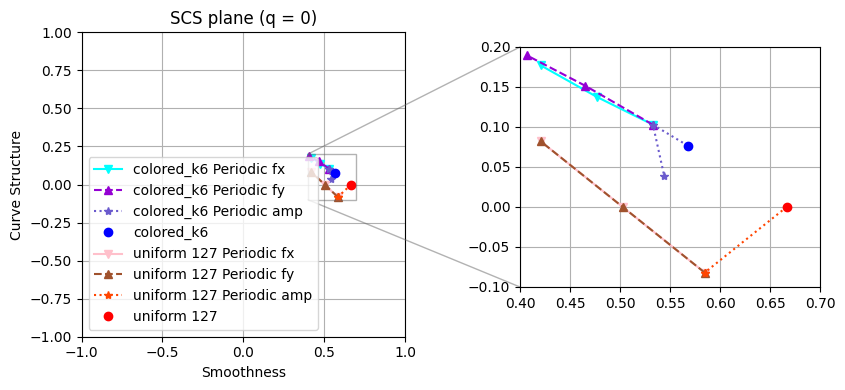

In [73]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_fx': 'cyan',
    'colored_k6_noise_fy': 'darkviolet',
    'colored_k6_noise_amp': 'slateblue',
    'uniform 127': 'red',
    'uniform 127_noise_fx': 'pink',
    'uniform 127_noise_fy': 'sienna',
    'uniform 127_noise_amp': 'orangered'
}
unique_default_images = default_data_q0['image_name'].unique()
fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_default_images):
    # Get the original data (no noise)
    df_no_noise = data_default_no_noise[(data_default_no_noise['image_name'] == imageName)]
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    # get data varying fx and setting fy=5 and amp = 15 
    df_noised_fx = df_data_filtered[(df_data_filtered['amp_value'] == 15) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
    axins.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
    # get data varying fy and setting fx=5 and amp = 15 
    df_noised_fy = df_data_filtered[(df_data_filtered['amp_value'] == 15) & (df_data_filtered['fx_value'] == 5)]
    ax_main.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} Periodic fy")
    axins.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} Periodic fy")
    # get data varying amp and setting fx=10 and fy = 10 
    df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} Periodic amp")
    axins.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} Periodic amp")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q = {q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.4, 0.7, -0.1, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/periodic/periodic_default_images_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

Data v2 (new values of amp and frequency)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")


q  Smoothness  Curve structure  Weighted Entropy Correct  \
7   0    0.623569         0.039683                  0.625098   
3   0    0.529927         0.082235                  0.653258   
8   0    0.478906         0.070828                  0.560935   
9   0    0.335678         0.173076                  0.600011   
10  0    0.174760         0.328120                  0.644347   
11  0    0.016233         0.486510                  0.663846   

    Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
7                      0.303865  0.956902  0.041391  0.001708  colored_k6   
3                      0.274235  0.863261  0.109487  0.027252  colored_k6   
8                      0.272267  0.812240  0.129294  0.058466  colored_k6   
9                      0.291802  0.669012  0.252032  0.078956  colored_k6   
10                     0.304032  0.508094  0.410013  0.081893  colored_k6   
11                     0.308016  0.349566  0.568472  0.081962  colored_k6   

    fx_value  fy_value  amp_value  
7          0         5         40  
3          5         5         40  
8         10         5         40  
9         20         5         40  
10        30         5         40  
11        40         5         40

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_no

q  Smoothness  Curve structure  Weighted Entropy Correct  \
24  0    0.666667     0.000000e+00                  0.217836   
20  0    0.584705    -8.196161e-02                  0.324262   
25  0    0.502743     1.387779e-17                  0.428488   
26  0    0.338820     1.639232e-01                  0.553889   
27  0    0.174829     3.279148e-01                  0.620814   
28  0    0.010905     4.918380e-01                  0.649004   

    Weighted Complexity Correct     prob0     prob1     prob2   image_name  \
24                     0.196475  1.000000  0.000000  0.000000  uniform 127   
20                     0.252413  0.918038  0.000000  0.081962  uniform 127   
25                     0.280826  0.836077  0.081962  0.081962  uniform 127   
26                     0.304142  0.672154  0.245885  0.081962  uniform 127   
27                     0.316485  0.508162  0.409876  0.081962  uniform 127   
28                     0.320880  0.344239  0.573800  0.081962  uniform 127   

    fx_value  fy_value  amp_value  
24         0         5         40  
20         5         5         40  
25        10         5         40  
26        20         5         40  
27        30         5         40  
28        40         5         40

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")


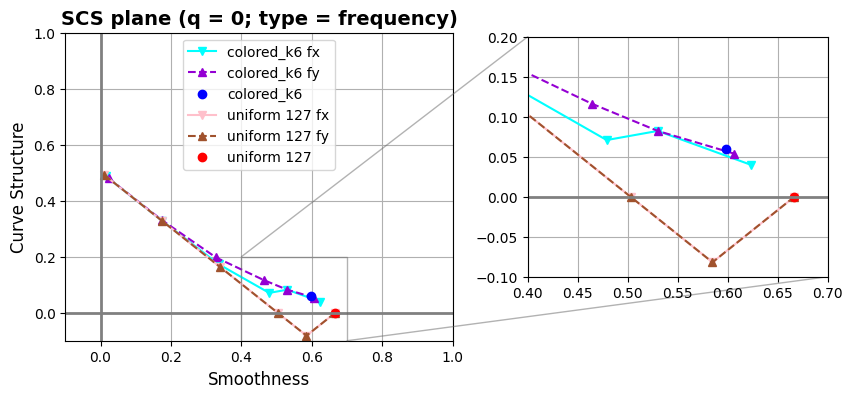

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k:" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\76417408.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k:" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")


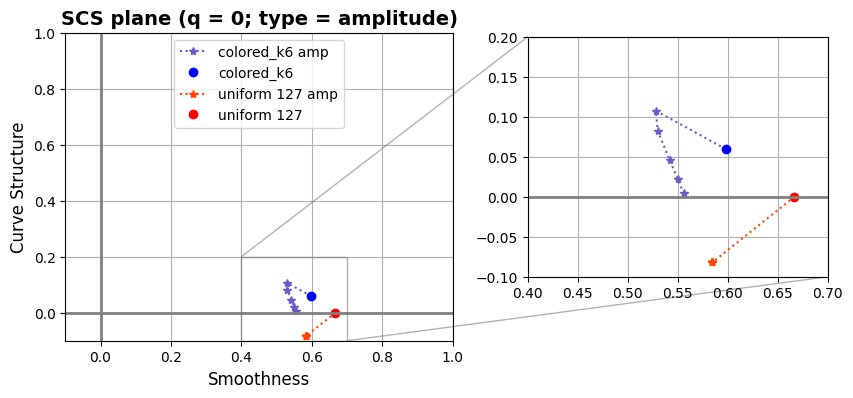

In [ ]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_fx': 'cyan',
    'colored_k6_noise_fy': 'darkviolet',
    'colored_k6_noise_amp': 'slateblue',
    'uniform 127': 'red',
    'uniform 127_noise_fx': 'pink',
    'uniform 127_noise_fy': 'sienna',
    'uniform 127_noise_amp': 'orangered'
}
unique_default_images = default_data_q0['image_name'].unique()


plots_params = ['frequency', 'amplitude']
for plot_p in plots_params:
    fig, ax_main =plt.subplots(figsize=(5,4))
    axins = plt.axes([1.05, 0.27, 0.6, 0.6])

    for i, imageName in enumerate(unique_default_images):
        # Get the original data (no noise)
        df_no_noise = data_default_no_noise[(data_default_no_noise['image_name'] == imageName)]
        # Filter DataFrame for the current imageName
        df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
        if plot_p == 'frequency':
            # get data varying fx and setting fy=5 and amp = 40 
            df_noised_fx = df_data_filtered[(df_data_filtered['amp_value'] == 40) & (df_data_filtered['fy_value'] == 5)].sort_values('fx_value')
            ax_main.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")
            axins.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")
            # get data varying fy and setting fx=5 and amp = 40 
            df_noised_fy = df_data_filtered[(df_data_filtered['amp_value'] == 40) & (df_data_filtered['fx_value'] == 5)].sort_values('fy_value')
            ax_main.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
            axins.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
        else:
            # get data varying amp and setting fx=5 and fy = 5 
            df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)].sort_values('amp_value')
            ax_main.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")
            axins.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")
        
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
        # plot it
        ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
        axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                        # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
        # Create scatter plot for Smoothness vs. Curve structure, colored by q
        # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

    # Set title and labels for the subplot
    ax_main.set_title(f'SCS plane (q = {q_value}; type = {plot_p})', fontsize=14, fontweight='bold')
    ax_main.set_xlabel('Smoothness', fontsize=12)
    ax_main.set_ylabel('Curve Structure', fontsize=12)
    ax_main.set_xlim([-0.1, 1.0])
    ax_main.set_ylim([-0.1, 1.0])
    ax_main.grid(True)
    ax_main.legend()
    ax_main.axhline(y=0, lw=2, color='gray')
    ax_main.axvline(x=0, lw=2, color='gray')
    axins.axhline(y=0, lw=2, color='gray')
    axins.axvline(x=0, lw=2, color='gray')

    x1, x2, y1, y2 = 0.4, 0.7, -0.1, 0.2
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.grid(True)
    ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
    # Adjust layout to prevent overlap
    # plt.tight_layout()
    # Save
    plt.savefig(f'results/noise_analysis/q0/periodic/periodic_default_images_scs_q{q_value}_{plot_p}.png', bbox_inches='tight')
    # Show the plot
    plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2530528188.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


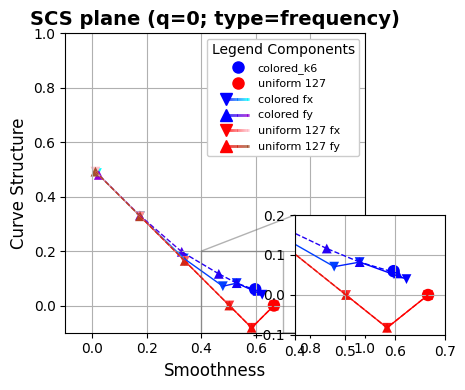

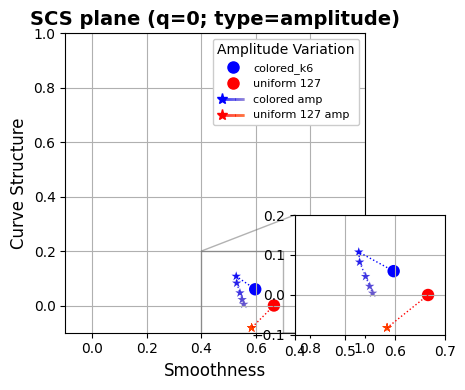

In [105]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color, variation_type):
        self.original_color = original_color
        self.noise_color = noise_color
        self.variation_type = variation_type

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle=self.get_linestyle(orig_handle.variation_type),
            linewidth=2,
            transform=trans
        )
        
        marker = self.get_marker(orig_handle.variation_type)(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]
    
    def get_linestyle(self, variation_type):
        return {'fx': '-', 'fy': '--', 'amp': ':'}.get(variation_type, '-')
    
    def get_marker(self, variation_type):
        markers = {'fx': 'v', 'fy': '^', 'amp': '*'}
        return lambda *args, **kw: plt.Line2D(*args, marker=markers.get(variation_type, 'o'), **kw)

figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_fx': 'cyan',
    'colored_k6_noise_fy': 'darkviolet',
    'colored_k6_noise_amp': 'slateblue',
    'uniform 127': 'red',
    'uniform 127_noise_fx': 'pink',
    'uniform 127_noise_fy': 'sienna',
    'uniform 127_noise_amp': 'orangered'
}

unique_default_images = default_data_q0['image_name'].unique()
plots_params = ['frequency', 'amplitude']

def plot_gradient_variation(ax_main, axins, df, original_color, noise_color, var_type, param_values):
    if len(df) >= 2:
        x = df['Smoothness'].values
        y = df['Curve structure'].values
        params = df[param_values].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{var_type}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=params.min(), vmax=params.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle={'fx': '-', 'fy': '--', 'amp': ':'}[var_type],
                              linewidth=1)
            lc.set_array(params)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(params))
        marker = {'fx': 'v', 'fy': '^', 'amp': '*'}[var_type]
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker=marker, s=50)
        axins.scatter(x, y, c=colors, edgecolors='none', marker=marker, s=50)
        
        return GradientLegendHandle(original_color, noise_color, var_type)
    return None

for plot_p in plots_params:
    fig, ax_main = plt.subplots(figsize=(5,4))
    axins = plt.axes([0.65, 0.15, 0.3, 0.3])
    gradient_handles = []
    original_handles = []

    for i, imageName in enumerate(unique_default_images):
        original_color = figname_to_color[imageName]
        df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
        df_no_noise = df_data_filtered[
            (df_data_filtered['amp_value'] == 0) &
            (df_data_filtered['fx_value'] == 5) &
            (df_data_filtered['fy_value'] == 5)
        ]

        if plot_p == 'frequency':
            # Process fx variation
            df_fx = df_data_filtered[
                (df_data_filtered['amp_value'] == 40) & 
                (df_data_filtered['fy_value'] == 5)
            ].sort_values('fx_value')
            fx_handle = plot_gradient_variation(ax_main, axins, df_fx, original_color, 
                                              figname_to_color[f"{imageName}_noise_fx"], 'fx', 'fx_value')
            
            # Process fy variation
            df_fy = df_data_filtered[
                (df_data_filtered['amp_value'] == 40) & 
                (df_data_filtered['fx_value'] == 5)
            ].sort_values('fy_value')
            fy_handle = plot_gradient_variation(ax_main, axins, df_fy, original_color, 
                                              figname_to_color[f"{imageName}_noise_fy"], 'fy', 'fy_value')
            
            if fx_handle: gradient_handles.append(fx_handle)
            if fy_handle: gradient_handles.append(fy_handle)
        else:
            # Process amplitude variation
            df_amp = df_data_filtered[
                (df_data_filtered['fx_value'] == 5) & 
                (df_data_filtered['fy_value'] == 5)
            ].sort_values('amp_value')
            amp_handle = plot_gradient_variation(ax_main, axins, df_amp, original_color, 
                                               figname_to_color[f"{imageName}_noise_amp"], 'amp', 'amp_value')
            if amp_handle: gradient_handles.append(amp_handle)

        # Plot original points
        ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                       c=original_color, edgecolors='none', marker='o', s=80)
        axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                     c=original_color, edgecolors='none', marker='o', s=80)
        
        original_handles.append(
            plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                      label=imageName, markersize=8)
        )

    # Create combined legend
    all_labels = [h.get_label() for h in original_handles] + \
                [f"{img.split('_')[0]} {handle.variation_type}" 
                 for handle, img in zip(gradient_handles, np.repeat(unique_default_images, 2 if plot_p == 'frequency' else 1))]

    ax_main.legend(
        original_handles + gradient_handles,
        all_labels,
        handler_map={GradientLegendHandle: HandlerGradientLines()},
        loc='best',
        framealpha=1,
        fontsize=8,
        title='Legend Components' if plot_p == 'frequency' else 'Amplitude Variation',
        title_fontsize=10
    )

    # Configure axes
    ax_main.set_title(f'SCS plane (q={q_value}; type={plot_p})', fontsize=14, fontweight='bold')
    ax_main.set_xlabel('Smoothness', fontsize=12)
    ax_main.set_ylabel('Curve Structure', fontsize=12)
    ax_main.set_xlim([-0.1, 1.0])
    ax_main.set_ylim([-0.1, 1.0])
    ax_main.set_aspect('equal')
    ax_main.grid(True)

    # Configure inset
    axins.set_xlim(0.4, 0.7)
    axins.set_ylim(-0.1, 0.2)
    axins.set_aspect('auto')
    axins.grid(True)
    ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

    plt.tight_layout()
    # plt.savefig(f'results/noise_analysis/q0/periodic/periodic_default_images_scs_q{q_value}_{plot_p}.png', bbox_inches='tight')
    plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\930371816.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\930371816.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\930371816.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color

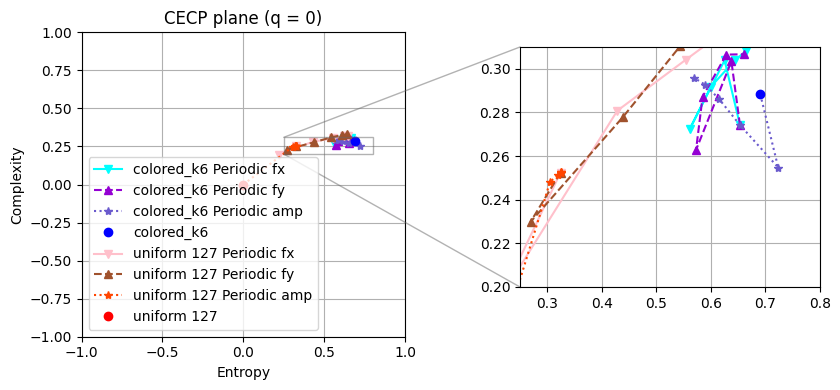

In [87]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_fx': 'cyan',
    'colored_k6_noise_fy': 'darkviolet',
    'colored_k6_noise_amp': 'slateblue',
    'uniform 127': 'red',
    'uniform 127_noise_fx': 'pink',
    'uniform 127_noise_fy': 'sienna',
    'uniform 127_noise_amp': 'orangered'
}
unique_default_images = default_data_q0['image_name'].unique()
fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]
    # get data varying fx and setting fy=5 and amp = 40 
    df_noised_fx = df_data_filtered[(df_data_filtered['amp_value'] == 40) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
    axins.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
    # get data varying fy and setting fx=5 and amp = 40 
    df_noised_fy = df_data_filtered[(df_data_filtered['amp_value'] == 40) & (df_data_filtered['fx_value'] == 5)]
    ax_main.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} Periodic fy")
    axins.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} Periodic fy")
    # get data varying amp and setting fx=10 and fy = 10 
    df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} Periodic amp")
    axins.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} Periodic amp")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Entropy vs. Complexity, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q = {q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.25, 0.8, 0.2, 0.31
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/periodic/periodic_default_images_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")


q  Smoothness  Curve structure  Weighted Entropy Correct  \
7   0    0.623569         0.039683                  0.625098   
3   0    0.529927         0.082235                  0.653258   
8   0    0.478906         0.070828                  0.560935   
9   0    0.335678         0.173076                  0.600011   
10  0    0.174760         0.328120                  0.644347   
11  0    0.016233         0.486510                  0.663846   

    Weighted Complexity Correct     prob0     prob1     prob2  image_name  \
7                      0.303865  0.956902  0.041391  0.001708  colored_k6   
3                      0.274235  0.863261  0.109487  0.027252  colored_k6   
8                      0.272267  0.812240  0.129294  0.058466  colored_k6   
9                      0.291802  0.669012  0.252032  0.078956  colored_k6   
10                     0.304032  0.508094  0.410013  0.081893  colored_k6   
11                     0.308016  0.349566  0.568472  0.081962  colored_k6   

    fx_value  fy_value  amp_value  
7          0         5         40  
3          5         5         40  
8         10         5         40  
9         20         5         40  
10        30         5         40  
11        40         5         40

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The k

q  Smoothness  Curve structure  Weighted Entropy Correct  \
24  0    0.666667     0.000000e+00                  0.217836   
20  0    0.584705    -8.196161e-02                  0.324262   
25  0    0.502743     1.387779e-17                  0.428488   
26  0    0.338820     1.639232e-01                  0.553889   
27  0    0.174829     3.279148e-01                  0.620814   
28  0    0.010905     4.918380e-01                  0.649004   

    Weighted Complexity Correct     prob0     prob1     prob2   image_name  \
24                     0.196475  1.000000  0.000000  0.000000  uniform 127   
20                     0.252413  0.918038  0.000000  0.081962  uniform 127   
25                     0.280826  0.836077  0.081962  0.081962  uniform 127   
26                     0.304142  0.672154  0.245885  0.081962  uniform 127   
27                     0.316485  0.508162  0.409876  0.081962  uniform 127   
28                     0.320880  0.344239  0.573800  0.081962  uniform 127   

    fx_value  fy_value  amp_value  
24         0         5         40  
20         5         5         40  
25        10         5         40  
26        20         5         40  
27        30         5         40  
28        40         5         40

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")


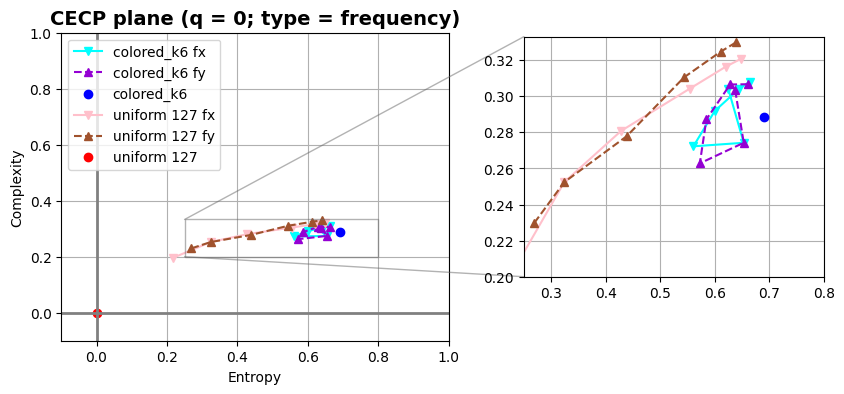

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k:" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\2797579310.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*k:" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")


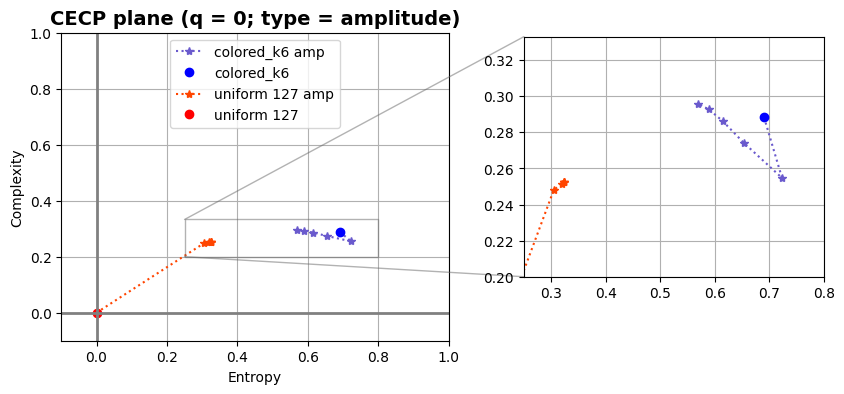

In [93]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise_fx': 'cyan',
    'colored_k6_noise_fy': 'darkviolet',
    'colored_k6_noise_amp': 'slateblue',
    'uniform 127': 'red',
    'uniform 127_noise_fx': 'pink',
    'uniform 127_noise_fy': 'sienna',
    'uniform 127_noise_amp': 'orangered'
}
unique_default_images = default_data_q0['image_name'].unique()
plots_params = ['frequency', 'amplitude']
for plot_p in plots_params:
    fig, ax_main =plt.subplots(figsize=(5,4))
    axins = plt.axes([1.05, 0.27, 0.6, 0.6])

    for i, imageName in enumerate(unique_default_images):
        # Filter DataFrame for the current imageName
        df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)]

        if plot_p == 'frequency':
            # get data varying fx and setting fy=5 and amp = 40 
            df_noised_fx = df_data_filtered[(df_data_filtered['amp_value'] == 40) & (df_data_filtered['fy_value'] == 5)].sort_values('fx_value')
            ax_main.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")
            axins.plot(df_noised_fx['Weighted Entropy Correct'], df_noised_fx['Weighted Complexity Correct'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} fx")
            display(df_noised_fx)
            # get data varying fy and setting fx=5 and amp = 40 
            df_noised_fy = df_data_filtered[(df_data_filtered['amp_value'] == 40) & (df_data_filtered['fx_value'] == 5)].sort_values('fy_value')
            ax_main.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
            axins.plot(df_noised_fy['Weighted Entropy Correct'], df_noised_fy['Weighted Complexity Correct'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} fy")
        else:
            # get data varying amp and setting fx=10 and fy = 10 
            df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)].sort_values('amp_value')
            ax_main.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")
            axins.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} amp")
        
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
        # plot it
        ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
        axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                        # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
        # Create scatter plot for Entropy vs. Complexity, colored by q
        # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])

    # Set title and labels for the subplot
    ax_main.set_title(f'CECP plane (q = {q_value}; type = {plot_p})', fontsize=14, fontweight='bold')
    ax_main.set_xlabel('Entropy')
    ax_main.set_ylabel('Complexity')
    ax_main.set_xlim([-0.1, 1.0])
    ax_main.set_ylim([-0.1, 1.0])
    ax_main.grid(True)
    ax_main.legend()
    ax_main.axhline(y=0, lw=2, color='gray')
    ax_main.axvline(x=0, lw=2, color='gray')
    axins.axhline(y=0, lw=2, color='gray')
    axins.axvline(x=0, lw=2, color='gray')

    x1, x2, y1, y2 = 0.25, 0.8, 0.2, 0.333
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.grid(True)
    ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
    # Adjust layout to prevent overlap
    # Save
    plt.savefig(f'results/noise_analysis/q0/periodic/periodic_default_images_cecp_q{q_value}_{plot_p}.png', bbox_inches='tight')
    # Show the plot
    plt.show()

## Plotting the plane for the dataset images (q=0)

In [42]:
dataset_data['q'].unique()

array([0], dtype=int64)

In [43]:
q_value = 0
dataset_data_q0 = dataset_data[(dataset_data['q'] == q_value)]
print(dataset_data.shape)
print(dataset_data_q0.shape)
dataset_data_q0.head()

(68, 12)
(68, 12)


q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.215946         0.203333                  0.945994   
1  0    0.215946         0.203333                  0.945994   
2  0    0.221615         0.205724                  0.948452   
3  0    0.244906         0.219999                  0.936666   
4  0    0.281857         0.218018                  0.912035   

   Weighted Complexity Correct     prob0     prob1     prob2  \
0                     0.069611  0.549279  0.327027  0.123694   
1                     0.069611  0.549279  0.327027  0.123694   
2                     0.067603  0.554948  0.325388  0.119664   
3                     0.081710  0.578239  0.320880  0.100881   
4                     0.106810  0.615190  0.301414  0.083396   

                 image_name  fx_value  fy_value  amp_value  
0  couscous01-r000-s001.png         0         0          0  
1  couscous01-r000-s001.png         5         5          0  
2  couscous01-r000-s001.png         5         5         20  
3  couscous01-r000-s001.png         5         5         40  
4  couscous01-r000-s001.png         5         5         60

In [44]:
filenames_dataset = dataset_data_q0['image_name'].unique()
filenames_dataset

array(['couscous01-r000-s001.png', 'lentils01-r000-s001.png',
       'sprinkles01-r000-s001.png', 'towel01-r000-s001.png'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_2360\2824209574.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_2360\2824209574.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk-" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_2360\2824209574.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k--" (-> color='k'). The keyword argument will take precedence.

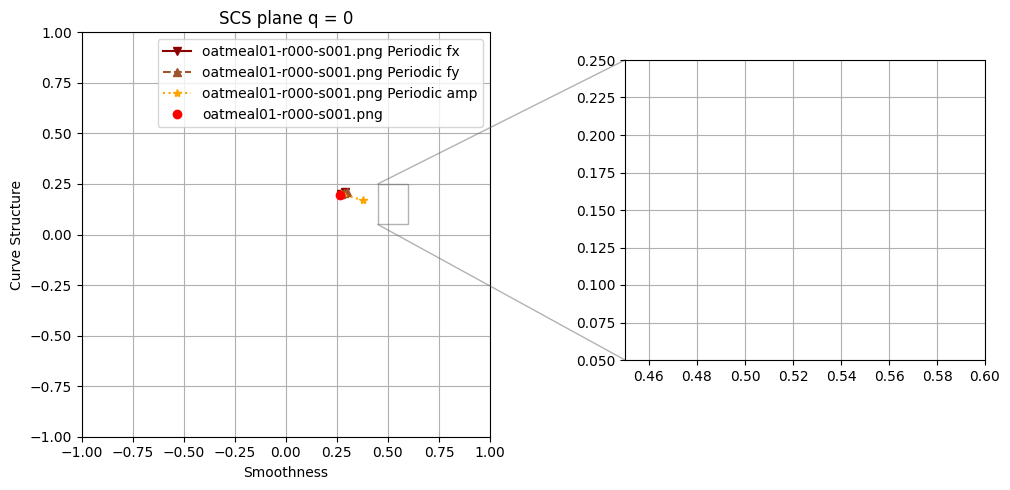

In [48]:
figname = 'oatmeal01-r000-s001.png'
figname_to_color = {
    f'{figname}': 'red',
    f'{figname}_noise_fx': 'darkred',
    f'{figname}_noise_fy': 'sienna',
    f'{figname}_noise_amp': 'orange'
}
unique_dataset_images = dataset_data_q0['image_name'].unique()
unique_dataset_images = [figname]
fig, ax_main =plt.subplots(figsize=(6, 5))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_dataset_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # get data varying fx and setting fy=5 and amp = 15 
    df_noised_fx = df_data_filtered[(df_data_filtered['amp_value'] == 15) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
    axins.plot(df_noised_fx['Smoothness'], df_noised_fx['Curve structure'], 'vk-', c=figname_to_color[f"{imageName}_noise_fx"], label=f"{imageName} Periodic fx")
    # get data varying fy and setting fx=5 and amp = 15 
    df_noised_fy = df_data_filtered[(df_data_filtered['amp_value'] == 15) & (df_data_filtered['fx_value'] == 5)]
    ax_main.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} Periodic fy")
    axins.plot(df_noised_fy['Smoothness'], df_noised_fy['Curve structure'], '^k--', c=figname_to_color[f"{imageName}_noise_fy"], label=f"{imageName} Periodic fy")
    # get data varying amp and setting fx=10 and fy = 10 
    df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} Periodic amp")
    axins.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], '*k:', c=figname_to_color[f"{imageName}_noise_amp"], label=f"{imageName} Periodic amp")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
# Set title and labels for the subplot
ax_main.set_title(f'SCS plane q = {q_value}')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.45, 0.6, 0.05, 0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

In [49]:
dataset_data_q0['amp_value'].unique()

array([ 0, 15, 60], dtype=int64)

In [50]:
dataset_data_q0['fx_value'].unique()

array([ 5, 10, 15], dtype=int64)

In [ ]:
dict_color = {
    'original': 'red',
    'noise_fx': 'darkred',
    'noise_fy': 'sienna',
    'noise_amp': 'orange'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 6
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    # pick a fy and fx
    fx_chosen = 5
    fy_chosen = 5
    amp_values = dataset_data_q0['amp_value'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, amp_chosen in enumerate(amp_values):
        # noised image
        noised_image = periodic_noise(fx_chosen, fy_chosen, amp_chosen, gs_image)
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} amp {amp_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # plots the original plane and ZOOMED IN
    for index in range(4, 6):
        # get data varying amp and setting fx=fy=5
        df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
        axs[i][index].plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], 'ok--', c=dict_color[f"noise_amp"], label=f"{imageName} Periodic amp")
        
        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
        # plot it
        axs[i][index].plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=dict_color["original"], label=f"{imageName}")
            
        # for j,sd_chosen in scatter_idxs:

        #     # Add colorbar for each subplot
        #     cbar = fig.colorbar(scatter, ax=axs[i][j])
        #     cbar.set_label('q')
        #     # Set title and labels for the subplot
        axs[i][index].set_xlabel('Smoothness')
        axs[i][index].set_ylabel('Curve Structure')
        axs[i][index].grid(True)
        axs[i][index].axhline(y=0, lw=2, color='r')
        axs[i][index].axvline(x=0, lw=2, color='r')
        if index == 4:
            axs[i][index].set_title('SCS plane')
            axs[i][index].set_xlim([-1, 1])
            axs[i][index].set_ylim([-1, 1])
        else:
            axs[i][index].set_title('SCS plane ZOOM')
            axs[i][index].set_xlim([np.min(df_noised_amp['Smoothness'])-0.1, np.max(df_noised_amp['Smoothness'])+0.1])
            axs[i][index].set_ylim([np.min(df_noised_amp['Curve structure'])-0.1, np.max(df_noised_amp['Curve structure'])+0.1])
# Adjust layout to prevent overlap
plt.tight_layout()
fig.suptitle(f"Periodic on dataset - q = {q_value}", size='xx-large')
fig.subplots_adjust(top=0.97)
# Save
plt.savefig(f'results/noise_analysis/q0/planes/periodic_dataset_comparing_SCSplane_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6840\3899826347.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_amp[x_label], df_noised_amp[y_label], 'ok--', c=dict_color[f"noise_amp"], label=f"{imageName} Periodic amp")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6840\3899826347.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_amp[x_label], df_noised_amp[y_label], 'ok--', c=dict_color[f"noise_amp"], label=f"{imageName} Periodic amp")


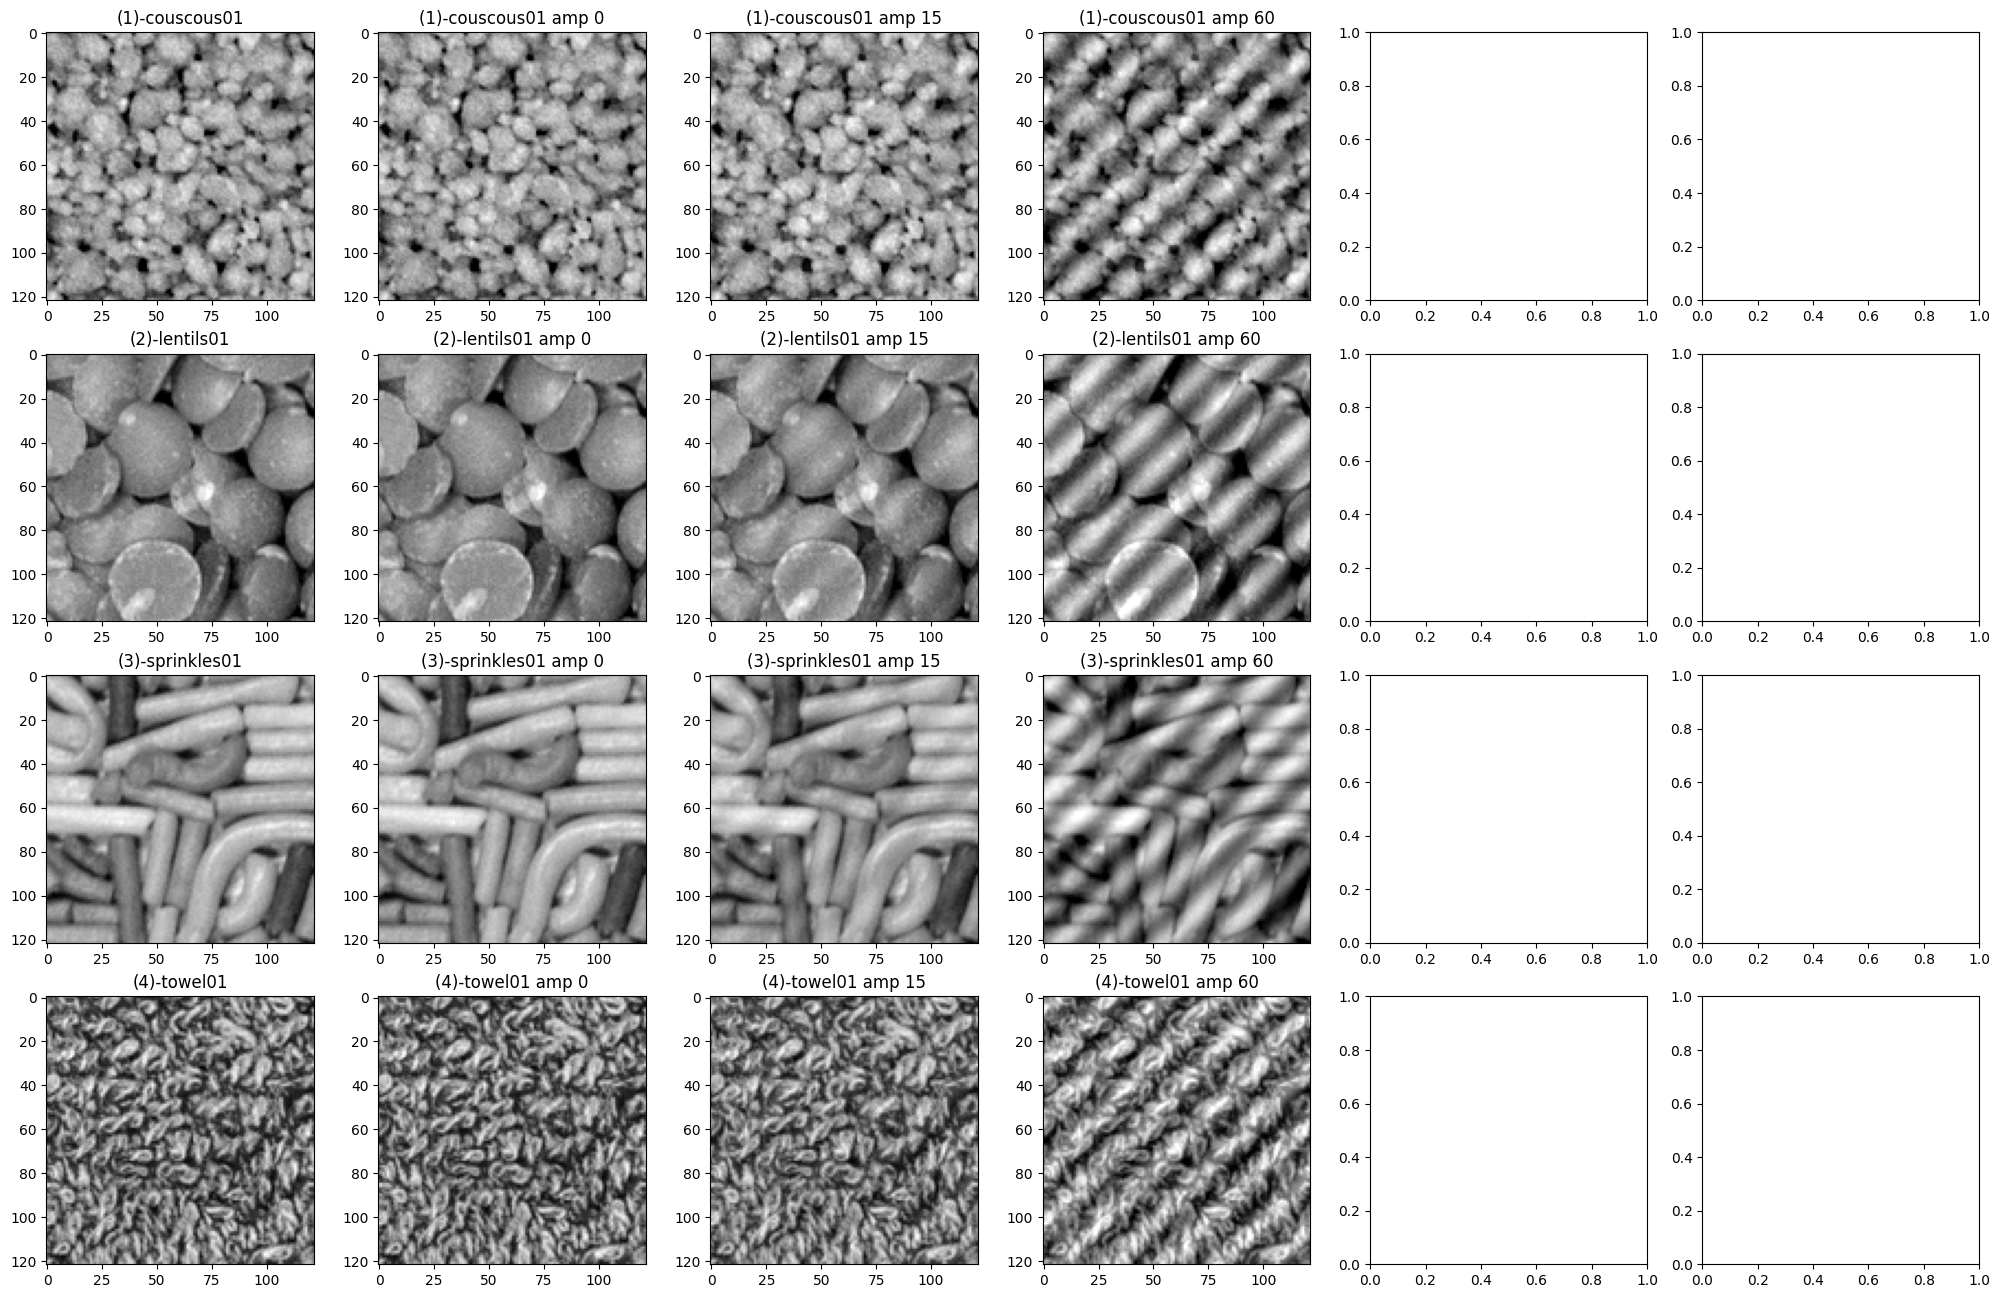

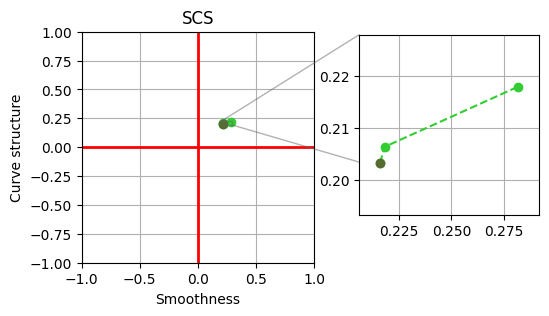

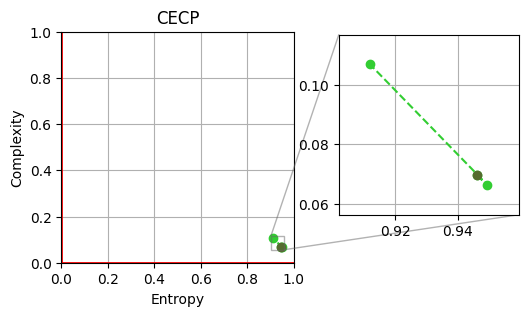

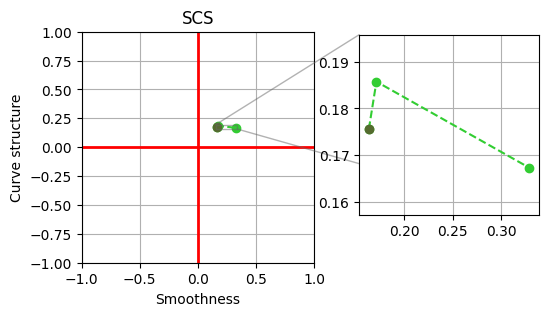

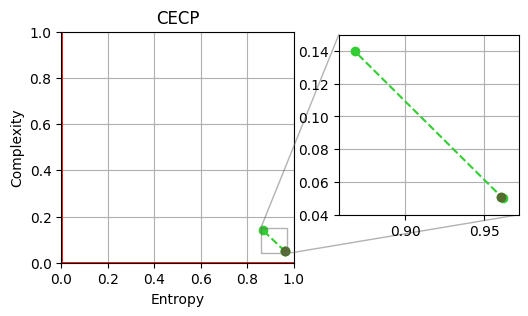

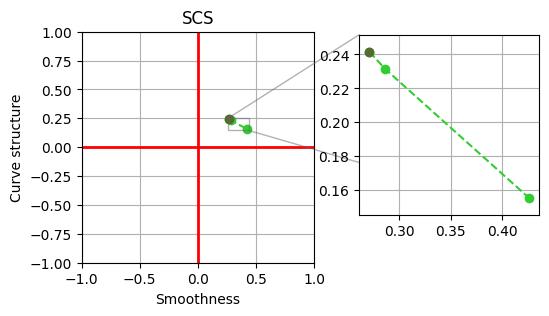

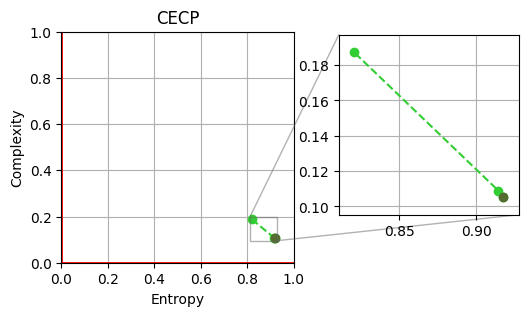

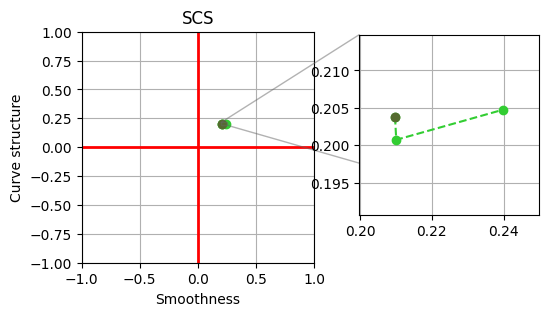

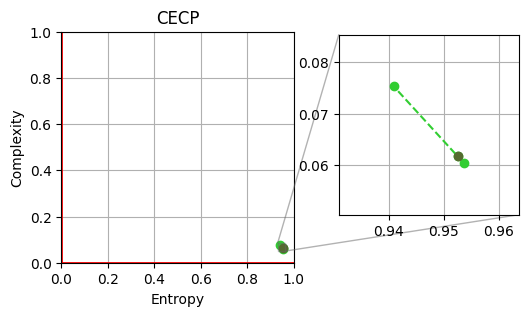

In [78]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_fx': 'darkred',
    'noise_fy': 'sienna',
    'noise_amp': 'limegreen'
}
# dict_color = {
#     'original': 'darkolivegreen',
#     'noise_sd': 'limegreen',
#     'noise_mean': 'yellow'
# }
amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 6
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/periodic/images"
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # pick a fy and fx
    fx_chosen = 5
    fy_chosen = 5
    amp_values = dataset_data_q0['amp_value'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, amp_chosen in enumerate(amp_values):
        # noised image
        noised_image = periodic_noise(fx_chosen, fy_chosen, amp_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-amp-{amp_chosen}.png")
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} amp {amp_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    for (x_label, y_label) in [('Smoothness', 'Curve structure'),('Weighted Entropy Correct', 'Weighted Complexity Correct')]:  
        fig, ax_main =plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])

        # get data varying amp and setting fx=fy=5
        df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
        ax_main.plot(df_noised_amp[x_label], df_noised_amp[y_label], 'ok--', c=dict_color[f"noise_amp"], label=f"{imageName} Periodic amp")
        axins.plot(df_noised_amp[x_label], df_noised_amp[y_label], 'ok--', c=dict_color[f"noise_amp"], label=f"{imageName} Periodic amp")

        # Get the original data (no noise)
        df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
        # plot it
        ax_main.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")
        axins.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")

        x1, x2 = np.min(df_noised_amp[x_label])-0.01, np.max(df_noised_amp[x_label])+0.01
        y1, y2 = np.min(df_noised_amp[y_label])-0.01, np.max(df_noised_amp[y_label])+0.01
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.grid(True)
        ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
                
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='r')
        ax_main.axvline(x=0, lw=2, color='r')

        if x_label == 'Smoothness':
            ax_main.set_xlabel(x_label)
            ax_main.set_ylabel(y_label)
            ax_main.set_title('SCS')
            ax_main.set_xlim([-1, 1])
            ax_main.set_ylim([-1, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_xlabel('Entropy')
            ax_main.set_ylabel('Complexity')
            ax_main.set_title('CECP')
            ax_main.set_xlim([0, 1])
            ax_main.set_ylim([0, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-cecp.png', bbox_inches='tight')


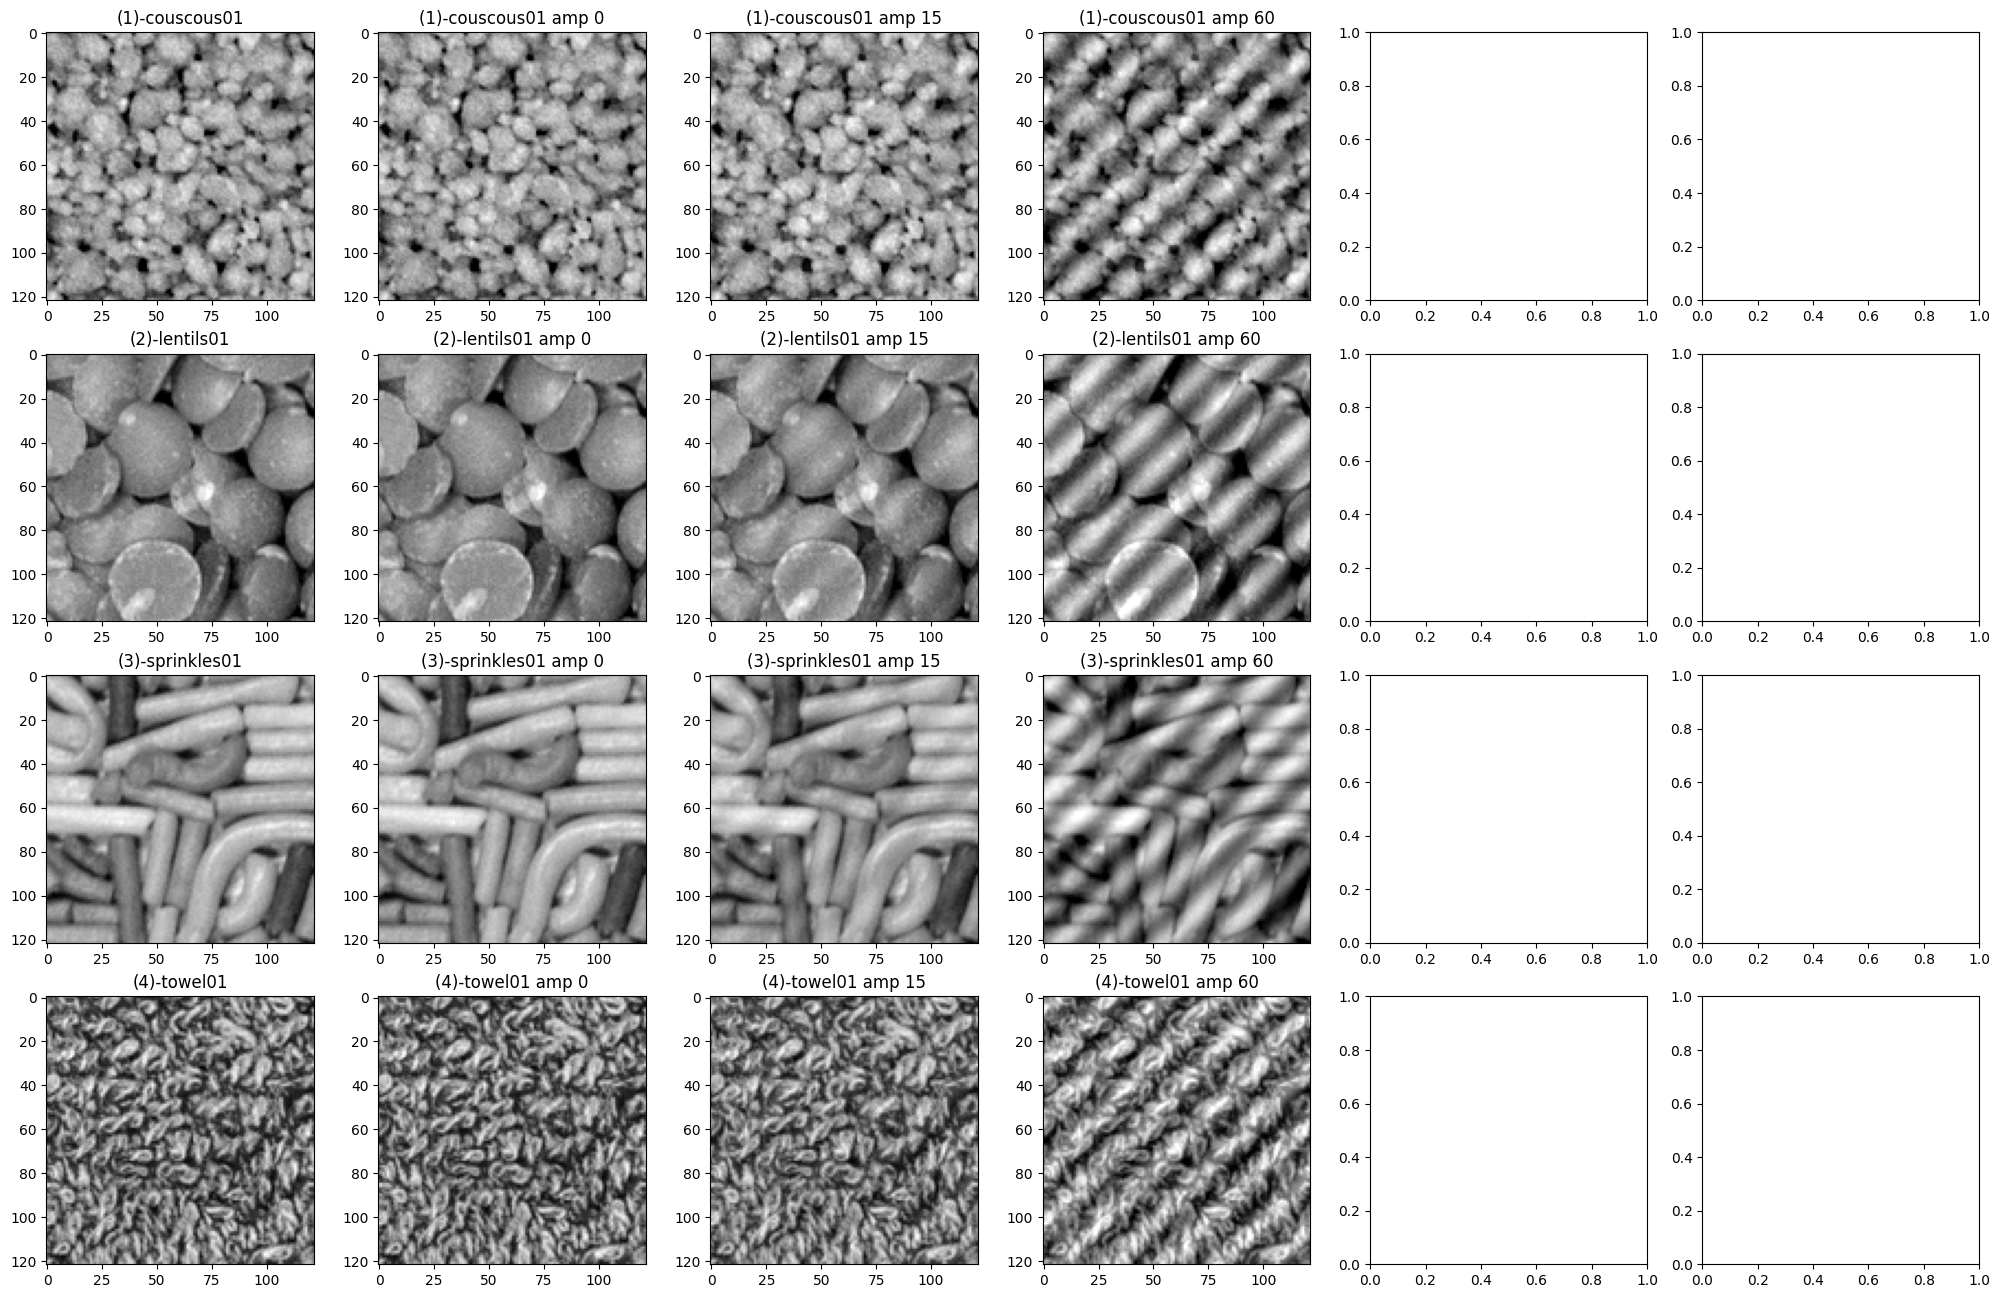

In [22]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

dict_color = {
    'original': 'darkolivegreen',
    'noise_fx': 'darkred',
    'noise_fy': 'sienna',
    'noise_amp': 'limegreen'
}
# dict_color = {
#     'original': 'darkolivegreen',
#     'noise_sd': 'limegreen',
#     'noise_mean': 'yellow'
# }
amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 6
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/periodic/images"

for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # pick a fy and fx
    fx_chosen = 5
    fy_chosen = 5
    amp_values = dataset_data_q0['amp_value'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, amp_chosen in enumerate(amp_values):
        # noised image
        noised_image = periodic_noise(fx_chosen, fy_chosen, amp_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-amp-{amp_chosen}.png")
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} amp {amp_chosen}")

    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    
    for (x_label, y_label) in [('Smoothness', 'Curve structure'), ('Weighted Entropy Correct', 'Weighted Complexity Correct')]:
        fig, ax_main = plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])

        # Process data with gradient
        df_noised_amp = df_data_filtered[
            (df_data_filtered['fx_value'] == 5) & 
            (df_data_filtered['fy_value'] == 5)
        ].sort_values('amp_value')
        
        if len(df_noised_amp) >= 2:
            x = df_noised_amp[x_label].values
            y = df_noised_amp[y_label].values
            amps = df_noised_amp['amp_value'].values
            
            # Create line segments
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            # Create colormap
            cmap = mcolors.LinearSegmentedColormap.from_list(
                "amp_gradient", [dict_color['original'], dict_color['noise_amp']]
            )
            norm = plt.Normalize(vmin=amps.min(), vmax=amps.max())
            
            # Plot gradient lines
            for ax in [ax_main, axins]:
                lc = LineCollection(segments, cmap=cmap, norm=norm, 
                                  linestyle='--', linewidth=1)
                lc.set_array(amps)
                ax.add_collection(lc)
            
            # Plot gradient markers
            colors = cmap(norm(amps))
            ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)
            axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)

        # Plot original point
        df_no_noise = df_data_filtered[
            (df_data_filtered['amp_value'] == 0) &
            (df_data_filtered['fx_value'] == 5) &
            (df_data_filtered['fy_value'] == 5)
        ]
        ax_main.scatter(df_no_noise[x_label], df_no_noise[y_label],
                       c=dict_color['original'], edgecolors='none', marker='o', s=50)
        axins.scatter(df_no_noise[x_label], df_no_noise[y_label],
                     c=dict_color['original'], edgecolors='none', marker='o', s=50)

        # Create legend
        gradient_handle = GradientLegendHandle(dict_color['original'], dict_color['noise_amp'])
        ax_main.legend(
            [gradient_handle, plt.Line2D([], [], color=dict_color['original'], marker='o', linestyle='None')],
            [f"{imageName.split('-')[0]} Periodic amp", f"{imageName.split('-')[0]}"],
            handler_map={GradientLegendHandle: HandlerGradientLines()},
            loc='best',
            framealpha=1,
            fontsize=8
        )

        # Configure axes
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='gray')
        ax_main.axvline(x=0, lw=2, color='gray')
        # Configure inset
        x1, x2 = np.min(x)-0.01, np.max(x)+0.01
        y1, y2 = np.min(y)-0.01, np.max(y)+0.01
        axins.set(xlim=(x1, x2), ylim=(y1, y2), aspect='auto')
        axins.axhline(y=0, lw=2, color='gray')
        axins.axvline(x=0, lw=2, color='gray')
        axins.grid(True)
        ax_main.indicate_inset_zoom(axins, edgecolor='0.4')
        
        if x_label == 'Smoothness':
            ax_main.set_title(f'SCS', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Smoothness', fontsize=12)
            ax_main.set_ylabel('Curve Structure', fontsize=12)
            ax_main.set(xlim=[-0.1, 1.0], ylim=[-0.1, 1.0])
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_title(f'CECP', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Entropy', fontsize=12)
            ax_main.set_ylabel('Complexity', fontsize=12)
            ax_main.set(xlim=[-0.1, 1.0], ylim=[-0.1, 1.0])
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-cecp.png', bbox_inches='tight')

        
        plt.close(fig)

Sintorn Quali

q  Smoothness  Curve structure  Weighted Entropy Correct  \
1  0    0.215946         0.203333                  0.945994   
2  0    0.221615         0.205724                  0.948452   
3  0    0.244906         0.219999                  0.936666   
4  0    0.281857         0.218018                  0.912035   
5  0    0.325706         0.202172                  0.878322   
6  0    0.372220         0.177242                  0.834687   

   Weighted Complexity Correct     prob0     prob1     prob2  \
1                     0.069611  0.549279  0.327027  0.123694   
2                     0.067603  0.554948  0.325388  0.119664   
3                     0.081710  0.578239  0.320880  0.100881   
4                     0.106810  0.615190  0.301414  0.083396   
5                     0.136896  0.659040  0.271566  0.069394   
6                     0.169983  0.705553  0.235845  0.058603   

                 image_name  fx_value  fy_value  amp_value  
1  couscous01-r000-s001.png         5         5          0  
2  couscous01-r000-s001.png         5         5         20  
3  couscous01-r000-s001.png         5         5         40  
4  couscous01-r000-s001.png         5         5         60  
5  couscous01-r000-s001.png         5         5         80  
6  couscous01-r000-s001.png         5         5        100

q  Smoothness  Curve structure  Weighted Entropy Correct  \
1  0    0.215946         0.203333                  0.945994   
2  0    0.221615         0.205724                  0.948452   
3  0    0.244906         0.219999                  0.936666   
4  0    0.281857         0.218018                  0.912035   
5  0    0.325706         0.202172                  0.878322   
6  0    0.372220         0.177242                  0.834687   

   Weighted Complexity Correct     prob0     prob1     prob2  \
1                     0.069611  0.549279  0.327027  0.123694   
2                     0.067603  0.554948  0.325388  0.119664   
3                     0.081710  0.578239  0.320880  0.100881   
4                     0.106810  0.615190  0.301414  0.083396   
5                     0.136896  0.659040  0.271566  0.069394   
6                     0.169983  0.705553  0.235845  0.058603   

                 image_name  fx_value  fy_value  amp_value  
1  couscous01-r000-s001.png         5         5          0  
2  couscous01-r000-s001.png         5         5         20  
3  couscous01-r000-s001.png         5         5         40  
4  couscous01-r000-s001.png         5         5         60  
5  couscous01-r000-s001.png         5         5         80  
6  couscous01-r000-s001.png         5         5        100

q  Smoothness  Curve structure  Weighted Entropy Correct  \
18  0    0.163354         0.175603                  0.960452   
19  0    0.180771         0.189468                  0.957780   
20  0    0.253580         0.189741                  0.918710   
21  0    0.328848         0.167338                  0.867990   
22  0    0.388475         0.141862                  0.817177   
23  0    0.434305         0.112834                  0.768082   

    Weighted Complexity Correct     prob0     prob1     prob2  \
18                     0.050661  0.496687  0.339458  0.163855   
19                     0.054423  0.514104  0.337682  0.148214   
20                     0.094859  0.586913  0.301414  0.111673   
21                     0.139871  0.662182  0.252578  0.085240   
22                     0.178508  0.721809  0.210027  0.068165   
23                     0.210451  0.767639  0.172598  0.059764   

                 image_name  fx_value  fy_value  amp_value  
18  lentils01-r000-s001.png         5         5          0  
19  lentils01-r000-s001.png         5         5         20  
20  lentils01-r000-s001.png         5         5         40  
21  lentils01-r000-s001.png         5         5         60  
22  lentils01-r000-s001.png         5         5         80  
23  lentils01-r000-s001.png         5         5        100

q  Smoothness  Curve structure  Weighted Entropy Correct  \
18  0    0.163354         0.175603                  0.960452   
19  0    0.180771         0.189468                  0.957780   
20  0    0.253580         0.189741                  0.918710   
21  0    0.328848         0.167338                  0.867990   
22  0    0.388475         0.141862                  0.817177   
23  0    0.434305         0.112834                  0.768082   

    Weighted Complexity Correct     prob0     prob1     prob2  \
18                     0.050661  0.496687  0.339458  0.163855   
19                     0.054423  0.514104  0.337682  0.148214   
20                     0.094859  0.586913  0.301414  0.111673   
21                     0.139871  0.662182  0.252578  0.085240   
22                     0.178508  0.721809  0.210027  0.068165   
23                     0.210451  0.767639  0.172598  0.059764   

                 image_name  fx_value  fy_value  amp_value  
18  lentils01-r000-s001.png         5         5          0  
19  lentils01-r000-s001.png         5         5         20  
20  lentils01-r000-s001.png         5         5         40  
21  lentils01-r000-s001.png         5         5         60  
22  lentils01-r000-s001.png         5         5         80  
23  lentils01-r000-s001.png         5         5        100

q  Smoothness  Curve structure  Weighted Entropy Correct  \
35  0    0.271065         0.241650                  0.917611   
36  0    0.300435         0.226487                  0.907985   
37  0    0.369761         0.190083                  0.869731   
38  0    0.426041         0.155522                  0.820855   
39  0    0.464290         0.129704                  0.775544   
40  0    0.489151         0.104160                  0.734568   

    Weighted Complexity Correct     prob0     prob1     prob2  \
35                     0.105341  0.604399  0.318626  0.076976   
36                     0.115616  0.633768  0.296360  0.069872   
37                     0.150763  0.703094  0.243494  0.053412   
38                     0.187141  0.759374  0.198074  0.042552   
39                     0.215230  0.797623  0.166041  0.036336   
40                     0.235463  0.822485  0.140837  0.036678   

                   image_name  fx_value  fy_value  amp_value  
35  sprinkles01-r000-s001.png         5         5          0  
36  sprinkles01-r000-s001.png         5         5         20  
37  sprinkles01-r000-s001.png         5         5         40  
38  sprinkles01-r000-s001.png         5         5         60  
39  sprinkles01-r000-s001.png         5         5         80  
40  sprinkles01-r000-s001.png         5         5        100

q  Smoothness  Curve structure  Weighted Entropy Correct  \
35  0    0.271065         0.241650                  0.917611   
36  0    0.300435         0.226487                  0.907985   
37  0    0.369761         0.190083                  0.869731   
38  0    0.426041         0.155522                  0.820855   
39  0    0.464290         0.129704                  0.775544   
40  0    0.489151         0.104160                  0.734568   

    Weighted Complexity Correct     prob0     prob1     prob2  \
35                     0.105341  0.604399  0.318626  0.076976   
36                     0.115616  0.633768  0.296360  0.069872   
37                     0.150763  0.703094  0.243494  0.053412   
38                     0.187141  0.759374  0.198074  0.042552   
39                     0.215230  0.797623  0.166041  0.036336   
40                     0.235463  0.822485  0.140837  0.036678   

                   image_name  fx_value  fy_value  amp_value  
35  sprinkles01-r000-s001.png         5         5          0  
36  sprinkles01-r000-s001.png         5         5         20  
37  sprinkles01-r000-s001.png         5         5         40  
38  sprinkles01-r000-s001.png         5         5         60  
39  sprinkles01-r000-s001.png         5         5         80  
40  sprinkles01-r000-s001.png         5         5        100

q  Smoothness  Curve structure  Weighted Entropy Correct  \
52  0    0.209731         0.203811                  0.952536   
53  0    0.212394         0.200601                  0.953124   
54  0    0.222230         0.201967                  0.948915   
55  0    0.239920         0.204767                  0.940848   
56  0    0.264782         0.200943                  0.927097   
57  0    0.287048         0.196981                  0.906251   

    Weighted Complexity Correct     prob0     prob1     prob2  \
52                     0.061868  0.543064  0.330374  0.126562   
53                     0.061058  0.545728  0.327437  0.126836   
54                     0.066007  0.555563  0.323202  0.121235   
55                     0.075335  0.573253  0.315757  0.110990   
56                     0.089863  0.598115  0.301414  0.100471   
57                     0.109561  0.620381  0.288300  0.091319   

               image_name  fx_value  fy_value  amp_value  
52  towel01-r000-s001.png         5         5          0  
53  towel01-r000-s001.png         5         5         20  
54  towel01-r000-s001.png         5         5         40  
55  towel01-r000-s001.png         5         5         60  
56  towel01-r000-s001.png         5         5         80  
57  towel01-r000-s001.png         5         5        100

q  Smoothness  Curve structure  Weighted Entropy Correct  \
52  0    0.209731         0.203811                  0.952536   
53  0    0.212394         0.200601                  0.953124   
54  0    0.222230         0.201967                  0.948915   
55  0    0.239920         0.204767                  0.940848   
56  0    0.264782         0.200943                  0.927097   
57  0    0.287048         0.196981                  0.906251   

    Weighted Complexity Correct     prob0     prob1     prob2  \
52                     0.061868  0.543064  0.330374  0.126562   
53                     0.061058  0.545728  0.327437  0.126836   
54                     0.066007  0.555563  0.323202  0.121235   
55                     0.075335  0.573253  0.315757  0.110990   
56                     0.089863  0.598115  0.301414  0.100471   
57                     0.109561  0.620381  0.288300  0.091319   

               image_name  fx_value  fy_value  amp_value  
52  towel01-r000-s001.png         5         5          0  
53  towel01-r000-s001.png         5         5         20  
54  towel01-r000-s001.png         5         5         40  
55  towel01-r000-s001.png         5         5         60  
56  towel01-r000-s001.png         5         5         80  
57  towel01-r000-s001.png         5         5        100

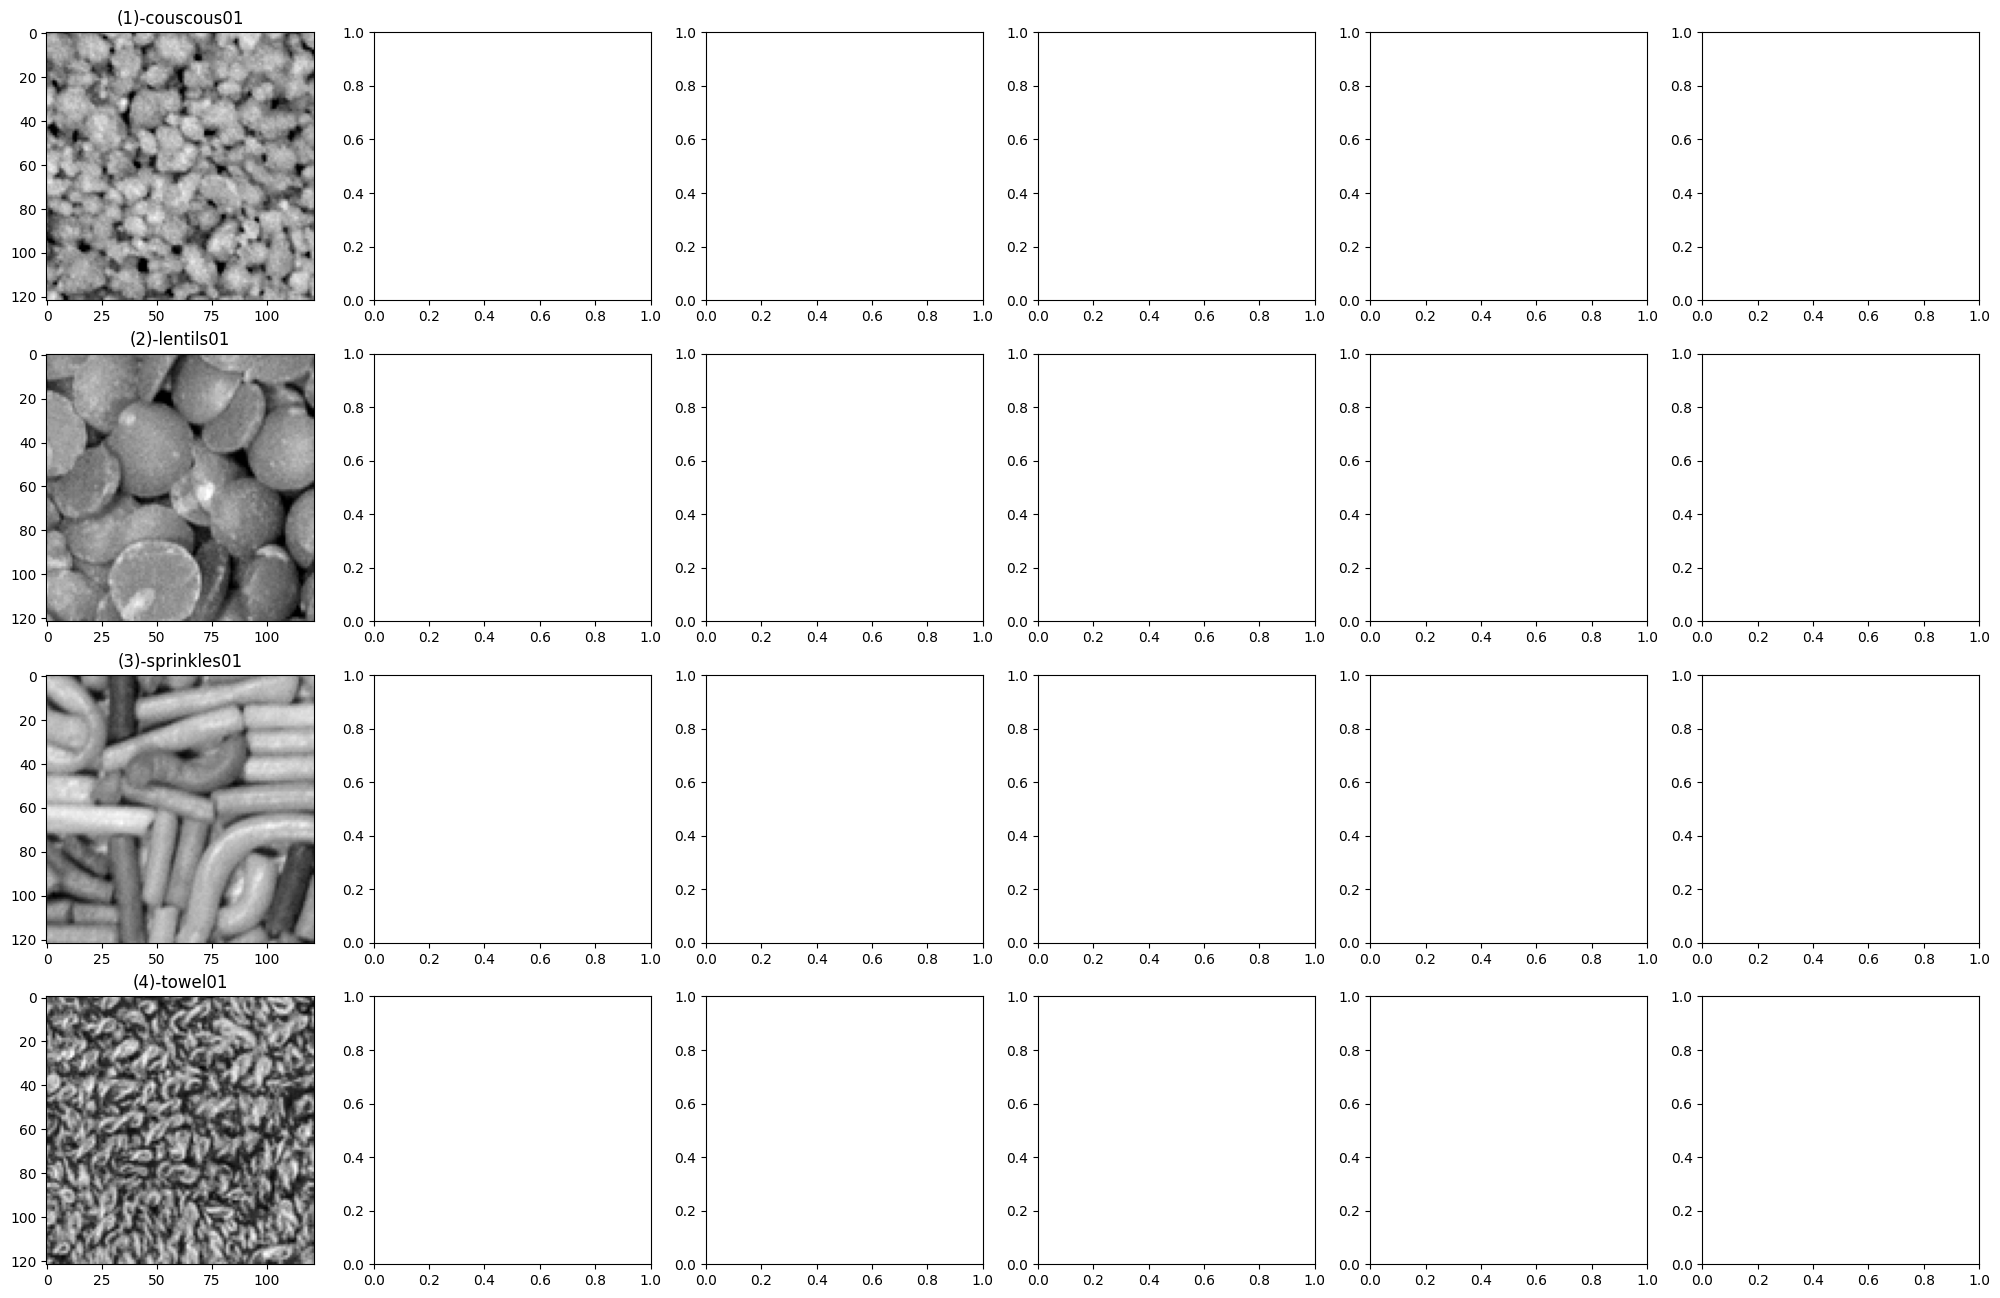

In [54]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

dict_color = {
    'original': 'darkolivegreen',
    'noise_fx': 'darkred',
    'noise_fy': 'sienna',
    'noise_amp': 'limegreen'
}
# dict_color = {
#     'original': 'darkolivegreen',
#     'noise_sd': 'limegreen',
#     'noise_mean': 'yellow'
# }
amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 6
# chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(25, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/periodic/images"

for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # pick a fy and fx
    fx_chosen = 5
    fy_chosen = 5
    amp_values = dataset_data_q0['amp_value'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, amp_chosen in enumerate(amp_values):
        # noised image
        noised_image = periodic_noise(fx_chosen, fy_chosen, amp_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-amp-{amp_chosen}.png")
        # plot noised image
        # axs[i][idx+1].imshow(noised_image, cmap='gray')
        # axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} amp {amp_chosen}")

    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    
    for (x_label, y_label) in [('Smoothness', 'Curve structure'), ('Weighted Entropy Correct', 'Weighted Complexity Correct')]:
        fig, ax_main = plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.07, 0.27, 0.6, 0.6])

        # Process data with gradient
        df_noised_amp = df_data_filtered[
            (df_data_filtered['fx_value'] == 5) & 
            (df_data_filtered['fy_value'] == 5)
        ].sort_values('amp_value')
        display(df_noised_amp)
        
        if len(df_noised_amp) >= 2:
            x = df_noised_amp[x_label].values
            y = df_noised_amp[y_label].values
            amps = df_noised_amp['amp_value'].values
            
            # Create line segments
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            
            # Create colormap
            cmap = mcolors.LinearSegmentedColormap.from_list(
                "amp_gradient", [dict_color['original'], dict_color['noise_amp']]
            )
            norm = plt.Normalize(vmin=amps.min(), vmax=amps.max())
            
            # Plot gradient lines
            for ax in [ax_main, axins]:
                lc = LineCollection(segments, cmap=cmap, norm=norm, 
                                  linestyle='--', linewidth=1)
                lc.set_array(amps)
                ax.add_collection(lc)
            
            # Plot gradient markers
            colors = cmap(norm(amps))
            ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)
            axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)

        # Plot original point
        df_no_noise = df_data_filtered[
            (df_data_filtered['amp_value'] == 0) &
            (df_data_filtered['fx_value'] == 5) &
            (df_data_filtered['fy_value'] == 5)
        ]
        ax_main.scatter(df_no_noise[x_label], df_no_noise[y_label],
                       c=dict_color['original'], edgecolors='none', marker='o', s=50)
        axins.scatter(df_no_noise[x_label], df_no_noise[y_label],
                     c=dict_color['original'], edgecolors='none', marker='o', s=50)

        # Create legend
        gradient_handle = GradientLegendHandle(dict_color['original'], dict_color['noise_amp'])
        ax_main.legend(
            [gradient_handle, plt.Line2D([], [], color=dict_color['original'], marker='o', linestyle='None')],
            [f"{imageName.split('-')[0]} Periodic amp", f"{imageName.split('-')[0]}"],
            handler_map={GradientLegendHandle: HandlerGradientLines()},
            loc='best',
            framealpha=1,
            fontsize=8
        )

        # Configure axes
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='gray')
        ax_main.axvline(x=0, lw=2, color='gray')
        # Configure inset
        x1, x2 = np.min(x)-0.01, np.max(x)+0.01
        y1, y2 = np.min(y)-0.01, np.max(y)+0.01
        axins.set(xlim=(x1, x2), ylim=(y1, y2), aspect='auto')
        axins.axhline(y=0, lw=2, color='gray')
        axins.axvline(x=0, lw=2, color='gray')
        axins.grid(True)
        ax_main.indicate_inset_zoom(axins, edgecolor='0.4')
        
        if x_label == 'Smoothness':
            ax_main.set_title(f'SCS', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Smoothness', fontsize=12)
            ax_main.set_ylabel('Curve Structure', fontsize=12)
            ax_main.set(xlim=[-0.1, 1.0], ylim=[-0.1, 1.0])
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_title(f'CECP', fontsize=14, fontweight='bold')
            ax_main.set_xlabel('Entropy', fontsize=12)
            ax_main.set_ylabel('Complexity', fontsize=12)
            ax_main.set(xlim=[-0.1, 1.0], ylim=[-0.1, 1.0])
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-cecp.png', bbox_inches='tight')

        
        plt.close(fig)

## SKIMAGE IMAGES

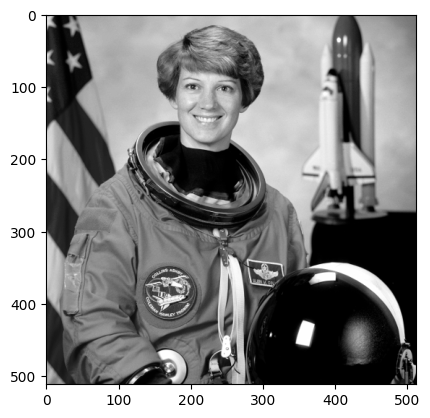

In [30]:
astronaut_image = data.astronaut()
astronaut_image = rgb2gray(astronaut_image)
plt.imshow(astronaut_image, cmap='gray')

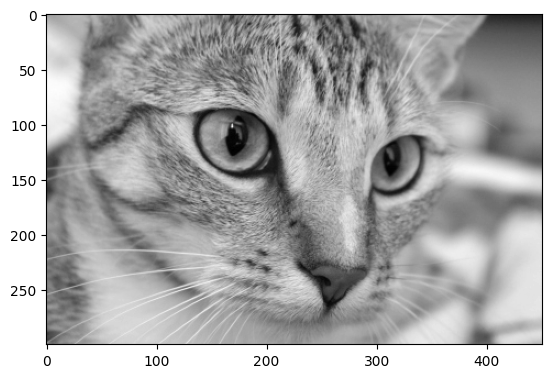

In [66]:
astronaut_image = data.cat()
astronaut_image = rgb2gray(astronaut_image)
plt.imshow(astronaut_image, cmap='gray')

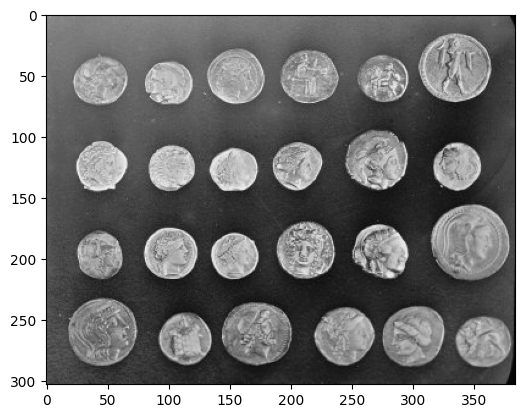

In [51]:
astronaut_image = data.coins()
plt.imshow(astronaut_image, cmap='gray')

In [94]:
skimage_data = pd.read_csv(f"results/noise_analysis/periodic/periodic_analysis_skimage_v2_quali.csv")
skimage_data.head(10)

q  Smoothness  Curve structure  Weighted Entropy Correct  \
0  0    0.237211         0.143550                  0.919862   
1  0    0.237211         0.143550                  0.919862   
2  0    0.259805         0.141260                  0.910286   
3  0    0.315573         0.148131                  0.875008   
4  0    0.374197         0.136680                  0.826308   
5  0    0.425039         0.116911                  0.775735   
6  0    0.459893         0.102516                  0.732838   
7  0    0.291817         0.161017                  0.887908   
8  0    0.350200         0.163717                  0.850139   
9  0    0.366446         0.190877                  0.815944   

   Weighted Complexity Correct     prob0     prob1     prob2      image_name  \
0                     0.086886  0.570544  0.286503  0.142953  data.astronaut   
1                     0.086886  0.570544  0.286503  0.142953  data.astronaut   
2                     0.096283  0.593139  0.274061  0.132801  data.astronaut   
3                     0.126090  0.648906  0.249612  0.101482  data.astronaut   
4                     0.161558  0.707530  0.214575  0.077895  data.astronaut   
5                     0.191814  0.758373  0.179269  0.062358  data.astronaut   
6                     0.212692  0.793226  0.154645  0.052129  data.astronaut   
7                     0.114246  0.625151  0.267933  0.106916  data.astronaut   
8                     0.154822  0.683534  0.240092  0.076375  data.astronaut   
9                     0.186475  0.699779  0.245549  0.054672  data.astronaut   

   fx_value  fy_value  amp_value  
0         0         0          0  
1         5         5          0  
2         5         5         20  
3         5         5         40  
4         5         5         60  
5         5         5         80  
6         5         5        100  
7         0         5         40  
8        10         5         40  
9        20         5         40

In [95]:
q_value = 0
skimage_data = skimage_data[(skimage_data['q'] == q_value)]

In [55]:
skimage_data['amp_value'].unique()

array([15, 60,  0], dtype=int64)

In [56]:
skimage_data['fx_value'].unique()

array([ 0,  5, 10, 15], dtype=int64)

In [24]:
skimage_data['image_name'].unique()

array(['data.astronaut', 'data.cat', 'data.coins'], dtype=object)

In [59]:
skimage_data[(skimage_data['fx_value'] == 5) & (skimage_data['fy_value'] == 5)]

q  Smoothness  Curve structure  Weighted Entropy Correct  \
232   0.0    0.665541         0.000299                  0.005070   
255   0.0    0.547140        -0.116923                  0.254552   
278   0.0    0.635585        -0.029833                  0.232003   
991   0.0    0.666667         0.000000                 -0.000000   
1014  0.0    0.586421        -0.032902                  0.292891   
1037  0.0    0.632739        -0.011498                  0.253530   
1750  0.0    0.184079         0.157185                  0.962638   
1773  0.0    0.192500         0.158136                  0.960213   
1796  0.0    0.312656         0.133272                  0.879461   

      Weighted Complexity Correct     prob0     prob1     prob2  \
232                      0.005026  0.998874  0.000712  0.000414   
255                      0.200397  0.880473  0.001302  0.118225   
278                      0.191898  0.968919  0.000624  0.030457   
991                     -0.000000  1.000000  0.000000  0.000000   
1014                     0.215788  0.919755  0.023671  0.056574   
1037                     0.202671  0.966072  0.011215  0.022713   
1750                     0.047222  0.517412  0.319887  0.162701   
1773                     0.049930  0.525833  0.316152  0.158015   
1796                     0.121826  0.645989  0.243641  0.110370   

          image_name  fx_value  fy_value  amp_value  
232   data.astronaut         5         5          0  
255   data.astronaut         5         5         15  
278   data.astronaut         5         5         60  
991         data.cat         5         5          0  
1014        data.cat         5         5         15  
1037        data.cat         5         5         60  
1750      data.coins         5         5          0  
1773      data.coins         5         5         15  
1796      data.coins         5         5         60

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\4024398176.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\4024398176.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\4024398176.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_lay

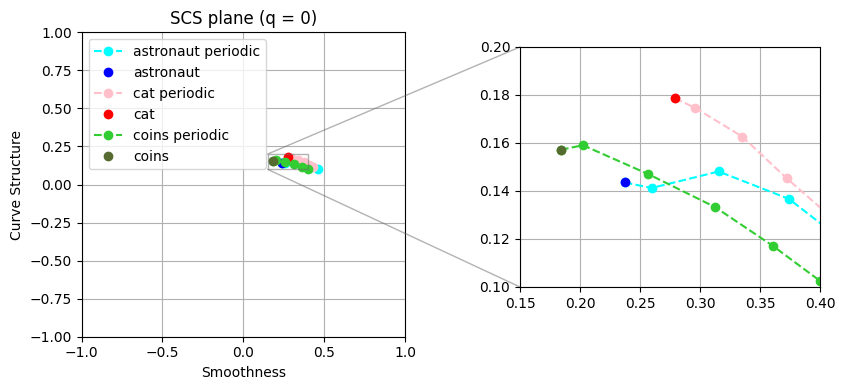

In [96]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying amp and setting fx=fy=5
    df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
    axins.plot(df_noised_amp['Smoothness'], df_noised_amp['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 0) & (df_data_filtered['fy_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q = {q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.15, 0.4, 0.1, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/periodic/periodic_skimage_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

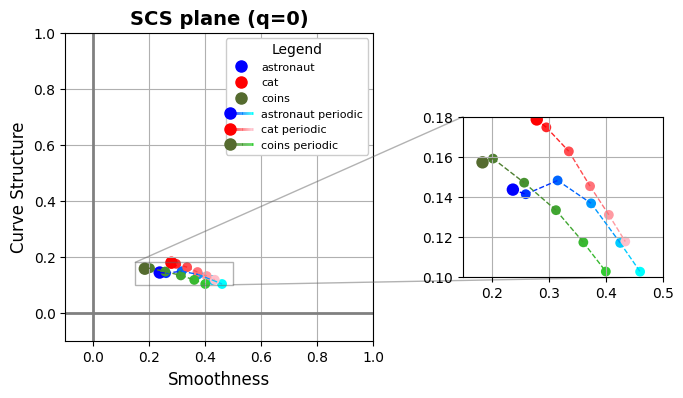

In [99]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.0, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    base_name = imageName.split('.')[1]
    
    # Get combined data sorted by amplitude
    df_noised_amp = df_data_filtered[
        (df_data_filtered['fx_value'] == 5) & 
        (df_data_filtered['fy_value'] == 5)
    ].sort_values('amp_value')
    
    df_no_noise = df_data_filtered[
        (df_data_filtered['amp_value'] == 0) &
        (df_data_filtered['fx_value'] == 0) &
        (df_data_filtered['fy_value'] == 0)
    ]
    
    # Combine data for gradient
    df_combined = pd.concat([df_no_noise, df_noised_amp]).sort_values('amp_value')
    
    if len(df_combined) >= 2:
        x = df_combined['Smoothness'].values
        y = df_combined['Curve structure'].values
        amps = df_combined['amp_value'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{base_name}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=amps.min(), vmax=amps.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(amps)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(amps))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                   c=original_color, edgecolors='none', marker='o', s=80)
    axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                 c=original_color, edgecolors='none', marker='o', s=80)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=base_name, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img.split('.')[1]} periodic" for img in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8,
    title='Legend',
    title_fontsize=10
)

# Configure axes
ax_main.set_title(f'SCS plane (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1.0])
ax_main.set_ylim([-0.1, 1.0])
ax_main.set_aspect('equal')
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
ax_main.grid(True)

# Configure inset
x1, x2, y1, y2 = 0.15, 0.5, 0.1, 0.18
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('auto')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/periodic/periodic_skimage_scs_q{q_value}.png', bbox_inches='tight')
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\3742572428.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\3742572428.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_4160\3742572428.py:49: UserWarning: This figure includes Axes that are not compatible with tight_la

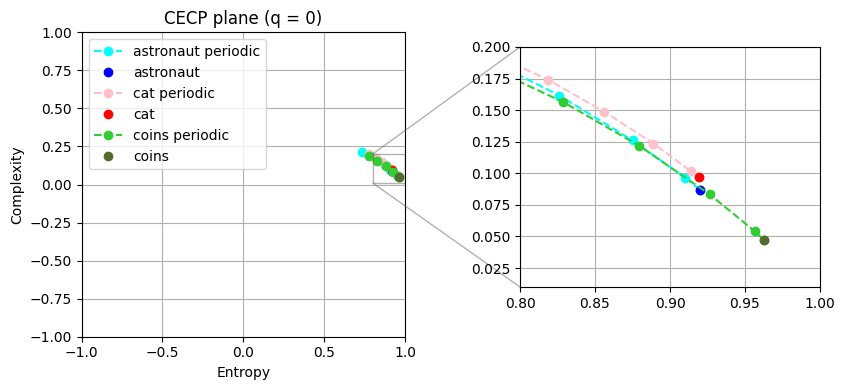

In [100]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying amp and setting fx=fy=5
    df_noised_amp = df_data_filtered[(df_data_filtered['fx_value'] == 5) & (df_data_filtered['fy_value'] == 5)]
    ax_main.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
    axins.plot(df_noised_amp['Weighted Entropy Correct'], df_noised_amp['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} periodic")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['amp_value'] == 0) & (df_data_filtered['fx_value'] == 0) & (df_data_filtered['fy_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q = {q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.8, 1, 0.01, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/periodic/periodic_skimage_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

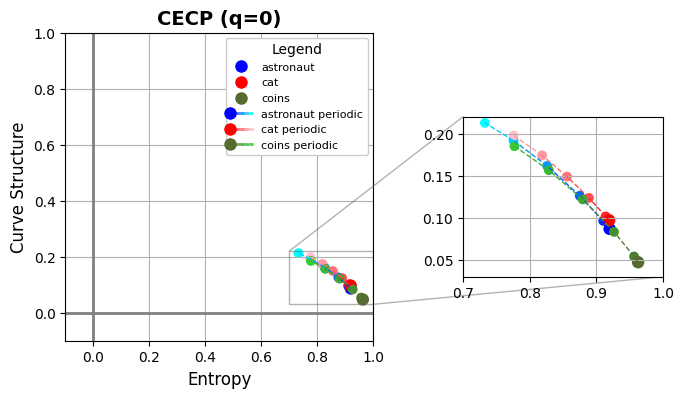

In [104]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.0, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    base_name = imageName.split('.')[1]
    
    # Get combined data sorted by amplitude
    df_noised_amp = df_data_filtered[
        (df_data_filtered['fx_value'] == 5) & 
        (df_data_filtered['fy_value'] == 5)
    ].sort_values('amp_value')
    
    df_no_noise = df_data_filtered[
        (df_data_filtered['amp_value'] == 0) &
        (df_data_filtered['fx_value'] == 0) &
        (df_data_filtered['fy_value'] == 0)
    ]
    
    # Combine data for gradient
    df_combined = pd.concat([df_no_noise, df_noised_amp]).sort_values('amp_value')
    
    if len(df_combined) >= 2:
        x = df_combined['Weighted Entropy Correct'].values
        y = df_combined['Weighted Complexity Correct'].values
        amps = df_combined['amp_value'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{base_name}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=amps.min(), vmax=amps.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(amps)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(amps))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    ax_main.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                   c=original_color, edgecolors='none', marker='o', s=80)
    axins.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                 c=original_color, edgecolors='none', marker='o', s=80)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=base_name, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img.split('.')[1]} periodic" for img in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8,
    title='Legend',
    title_fontsize=10
)

# Configure axes
ax_main.set_title(f'CECP (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1.0])
ax_main.set_ylim([-0.1, 1.0])
ax_main.set_aspect('equal')
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
ax_main.grid(True)

# Configure inset
x1, x2, y1, y2 = 0.7, 1, 0.03, 0.22
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('auto')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/periodic/periodic_skimage_cecp_q{q_value}.png', bbox_inches='tight')
plt.show()